#  필요 패키지 import

In [1]:
### 필요 패키지 import ###
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import cv2
import PIL
import matplotlib.pyplot as plt
import os

In [2]:
### /content/drive/Mydrive/빅데이터및AI 경로에서 모든 데이터의 경로를 저장하는 함수 ### 
def get_file_path(my_list,base_path):
    return [base_path+file for file in my_list]

In [4]:
train_path = "Train_datasets_labels.csv"
test_path = "Validation_datasets_labels.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

print(len(train_data))
print(len(test_data))

23389
300


In [8]:
concat_data = pd.concat([train_data, test_data])

print(len(concat_data))

23689


In [11]:
stone = concat_data[concat_data['label'] == 0]
pothole = concat_data[concat_data['label'] == 1]
filled = concat_data[concat_data['label'] == 2]

print(len(stone))
print(len(pothole))
print(len(filled))
print(len(stone) + len(pothole) + len(filled))

9274
7525
6890
23689


In [19]:
stone_path = stone["file_path"].values
pothole_path = pothole["file_path"].values
filled_path = filled["file_path"].values

print(len(stone_path))
print(len(pothole_path))
print(len(filled_path))
print(len(stone_path) + len(pothole_path) + len(filled_path))

9274
7525
6890
23689


In [21]:
def pre_processing(file_paths, label, base_path):
    global file_summary, idx
    
    for path in file_paths:
        print(path)
        if path[-3:] == 'ini':
            continue
        src = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(src, dsize=(320,320), interpolation=cv2.INTER_AREA)

        img_path = "{}/Image_{}.png".format(base_path,idx+1)
        cv2.imwrite(img_path, img)

        file_summary['file_path'].append(img_path)
        file_summary['label'].append(label)

        idx += 1

In [23]:
# 전처리한 데이터의 정보를 저장하는 dict
file_summary = {
    "file_path" : [],
    "label" : []
}
idx = 0                        # img의 ID
base_path = "Datasets"

pre_processing(stone_path, 0, base_path)
pre_processing(pothole_path, 1, base_path)
pre_processing(filled_path, 2, base_path)
pd.DataFrame(file_summary)

Datasets_Train/Image_1.png
Datasets_Train/Image_2.png
Datasets_Train/Image_3.png
Datasets_Train/Image_4.png
Datasets_Train/Image_5.png
Datasets_Train/Image_6.png
Datasets_Train/Image_7.png
Datasets_Train/Image_8.png
Datasets_Train/Image_9.png
Datasets_Train/Image_10.png
Datasets_Train/Image_11.png
Datasets_Train/Image_12.png
Datasets_Train/Image_13.png
Datasets_Train/Image_14.png
Datasets_Train/Image_15.png
Datasets_Train/Image_16.png
Datasets_Train/Image_17.png
Datasets_Train/Image_18.png
Datasets_Train/Image_19.png
Datasets_Train/Image_20.png
Datasets_Train/Image_21.png
Datasets_Train/Image_22.png
Datasets_Train/Image_23.png
Datasets_Train/Image_24.png
Datasets_Train/Image_25.png
Datasets_Train/Image_26.png
Datasets_Train/Image_27.png
Datasets_Train/Image_28.png
Datasets_Train/Image_29.png
Datasets_Train/Image_30.png
Datasets_Train/Image_31.png
Datasets_Train/Image_32.png
Datasets_Train/Image_33.png
Datasets_Train/Image_34.png
Datasets_Train/Image_35.png
Datasets_Train/Image_36.png
D

Datasets_Train/Image_290.png
Datasets_Train/Image_291.png
Datasets_Train/Image_292.png
Datasets_Train/Image_293.png
Datasets_Train/Image_294.png
Datasets_Train/Image_295.png
Datasets_Train/Image_296.png
Datasets_Train/Image_297.png
Datasets_Train/Image_298.png
Datasets_Train/Image_299.png
Datasets_Train/Image_300.png
Datasets_Train/Image_301.png
Datasets_Train/Image_302.png
Datasets_Train/Image_303.png
Datasets_Train/Image_304.png
Datasets_Train/Image_305.png
Datasets_Train/Image_306.png
Datasets_Train/Image_307.png
Datasets_Train/Image_308.png
Datasets_Train/Image_309.png
Datasets_Train/Image_310.png
Datasets_Train/Image_311.png
Datasets_Train/Image_312.png
Datasets_Train/Image_313.png
Datasets_Train/Image_314.png
Datasets_Train/Image_315.png
Datasets_Train/Image_316.png
Datasets_Train/Image_317.png
Datasets_Train/Image_318.png
Datasets_Train/Image_319.png
Datasets_Train/Image_320.png
Datasets_Train/Image_321.png
Datasets_Train/Image_322.png
Datasets_Train/Image_323.png
Datasets_Train

Datasets_Train/Image_587.png
Datasets_Train/Image_588.png
Datasets_Train/Image_589.png
Datasets_Train/Image_590.png
Datasets_Train/Image_591.png
Datasets_Train/Image_592.png
Datasets_Train/Image_593.png
Datasets_Train/Image_594.png
Datasets_Train/Image_595.png
Datasets_Train/Image_596.png
Datasets_Train/Image_597.png
Datasets_Train/Image_598.png
Datasets_Train/Image_599.png
Datasets_Train/Image_600.png
Datasets_Train/Image_601.png
Datasets_Train/Image_602.png
Datasets_Train/Image_603.png
Datasets_Train/Image_604.png
Datasets_Train/Image_605.png
Datasets_Train/Image_606.png
Datasets_Train/Image_607.png
Datasets_Train/Image_608.png
Datasets_Train/Image_609.png
Datasets_Train/Image_610.png
Datasets_Train/Image_611.png
Datasets_Train/Image_612.png
Datasets_Train/Image_613.png
Datasets_Train/Image_614.png
Datasets_Train/Image_615.png
Datasets_Train/Image_616.png
Datasets_Train/Image_617.png
Datasets_Train/Image_618.png
Datasets_Train/Image_619.png
Datasets_Train/Image_620.png
Datasets_Train

Datasets_Train/Image_883.png
Datasets_Train/Image_884.png
Datasets_Train/Image_885.png
Datasets_Train/Image_886.png
Datasets_Train/Image_887.png
Datasets_Train/Image_888.png
Datasets_Train/Image_889.png
Datasets_Train/Image_890.png
Datasets_Train/Image_891.png
Datasets_Train/Image_892.png
Datasets_Train/Image_893.png
Datasets_Train/Image_894.png
Datasets_Train/Image_895.png
Datasets_Train/Image_896.png
Datasets_Train/Image_897.png
Datasets_Train/Image_898.png
Datasets_Train/Image_899.png
Datasets_Train/Image_900.png
Datasets_Train/Image_901.png
Datasets_Train/Image_902.png
Datasets_Train/Image_903.png
Datasets_Train/Image_904.png
Datasets_Train/Image_905.png
Datasets_Train/Image_906.png
Datasets_Train/Image_907.png
Datasets_Train/Image_908.png
Datasets_Train/Image_909.png
Datasets_Train/Image_910.png
Datasets_Train/Image_911.png
Datasets_Train/Image_912.png
Datasets_Train/Image_913.png
Datasets_Train/Image_914.png
Datasets_Train/Image_915.png
Datasets_Train/Image_916.png
Datasets_Train

Datasets_Train/Image_1160.png
Datasets_Train/Image_1161.png
Datasets_Train/Image_1162.png
Datasets_Train/Image_1163.png
Datasets_Train/Image_1164.png
Datasets_Train/Image_1165.png
Datasets_Train/Image_1166.png
Datasets_Train/Image_1167.png
Datasets_Train/Image_1168.png
Datasets_Train/Image_1169.png
Datasets_Train/Image_1170.png
Datasets_Train/Image_1171.png
Datasets_Train/Image_1172.png
Datasets_Train/Image_1173.png
Datasets_Train/Image_1174.png
Datasets_Train/Image_1175.png
Datasets_Train/Image_1176.png
Datasets_Train/Image_1177.png
Datasets_Train/Image_1178.png
Datasets_Train/Image_1179.png
Datasets_Train/Image_1180.png
Datasets_Train/Image_1181.png
Datasets_Train/Image_1182.png
Datasets_Train/Image_1183.png
Datasets_Train/Image_1184.png
Datasets_Train/Image_1185.png
Datasets_Train/Image_1186.png
Datasets_Train/Image_1187.png
Datasets_Train/Image_1188.png
Datasets_Train/Image_1189.png
Datasets_Train/Image_1190.png
Datasets_Train/Image_1191.png
Datasets_Train/Image_1192.png
Datasets_T

Datasets_Train/Image_1447.png
Datasets_Train/Image_1448.png
Datasets_Train/Image_1449.png
Datasets_Train/Image_1450.png
Datasets_Train/Image_1451.png
Datasets_Train/Image_1452.png
Datasets_Train/Image_1453.png
Datasets_Train/Image_1454.png
Datasets_Train/Image_1455.png
Datasets_Train/Image_1456.png
Datasets_Train/Image_1457.png
Datasets_Train/Image_1458.png
Datasets_Train/Image_1459.png
Datasets_Train/Image_1460.png
Datasets_Train/Image_1461.png
Datasets_Train/Image_1462.png
Datasets_Train/Image_1463.png
Datasets_Train/Image_1464.png
Datasets_Train/Image_1465.png
Datasets_Train/Image_1466.png
Datasets_Train/Image_1467.png
Datasets_Train/Image_1468.png
Datasets_Train/Image_1469.png
Datasets_Train/Image_1470.png
Datasets_Train/Image_1471.png
Datasets_Train/Image_1472.png
Datasets_Train/Image_1473.png
Datasets_Train/Image_1474.png
Datasets_Train/Image_1475.png
Datasets_Train/Image_1476.png
Datasets_Train/Image_1477.png
Datasets_Train/Image_1478.png
Datasets_Train/Image_1479.png
Datasets_T

Datasets_Train/Image_1732.png
Datasets_Train/Image_1733.png
Datasets_Train/Image_1734.png
Datasets_Train/Image_1735.png
Datasets_Train/Image_1736.png
Datasets_Train/Image_1737.png
Datasets_Train/Image_1738.png
Datasets_Train/Image_1739.png
Datasets_Train/Image_1740.png
Datasets_Train/Image_1741.png
Datasets_Train/Image_1742.png
Datasets_Train/Image_1743.png
Datasets_Train/Image_1744.png
Datasets_Train/Image_1745.png
Datasets_Train/Image_1746.png
Datasets_Train/Image_1747.png
Datasets_Train/Image_1748.png
Datasets_Train/Image_1749.png
Datasets_Train/Image_1750.png
Datasets_Train/Image_1751.png
Datasets_Train/Image_1752.png
Datasets_Train/Image_1753.png
Datasets_Train/Image_1754.png
Datasets_Train/Image_1755.png
Datasets_Train/Image_1756.png
Datasets_Train/Image_1757.png
Datasets_Train/Image_1758.png
Datasets_Train/Image_1759.png
Datasets_Train/Image_1760.png
Datasets_Train/Image_1761.png
Datasets_Train/Image_1762.png
Datasets_Train/Image_1763.png
Datasets_Train/Image_1764.png
Datasets_T

Datasets_Train/Image_2016.png
Datasets_Train/Image_2017.png
Datasets_Train/Image_2018.png
Datasets_Train/Image_2019.png
Datasets_Train/Image_2020.png
Datasets_Train/Image_2021.png
Datasets_Train/Image_2022.png
Datasets_Train/Image_2023.png
Datasets_Train/Image_2024.png
Datasets_Train/Image_2025.png
Datasets_Train/Image_2026.png
Datasets_Train/Image_2027.png
Datasets_Train/Image_2028.png
Datasets_Train/Image_2029.png
Datasets_Train/Image_2030.png
Datasets_Train/Image_2031.png
Datasets_Train/Image_2032.png
Datasets_Train/Image_2033.png
Datasets_Train/Image_2034.png
Datasets_Train/Image_2035.png
Datasets_Train/Image_2036.png
Datasets_Train/Image_2037.png
Datasets_Train/Image_2038.png
Datasets_Train/Image_2039.png
Datasets_Train/Image_2040.png
Datasets_Train/Image_2041.png
Datasets_Train/Image_2042.png
Datasets_Train/Image_2043.png
Datasets_Train/Image_2044.png
Datasets_Train/Image_2045.png
Datasets_Train/Image_2046.png
Datasets_Train/Image_2047.png
Datasets_Train/Image_2048.png
Datasets_T

Datasets_Train/Image_2297.png
Datasets_Train/Image_2298.png
Datasets_Train/Image_2299.png
Datasets_Train/Image_2300.png
Datasets_Train/Image_2301.png
Datasets_Train/Image_2302.png
Datasets_Train/Image_2303.png
Datasets_Train/Image_2304.png
Datasets_Train/Image_2305.png
Datasets_Train/Image_2306.png
Datasets_Train/Image_2307.png
Datasets_Train/Image_2308.png
Datasets_Train/Image_2309.png
Datasets_Train/Image_2310.png
Datasets_Train/Image_2311.png
Datasets_Train/Image_2312.png
Datasets_Train/Image_2313.png
Datasets_Train/Image_2314.png
Datasets_Train/Image_2315.png
Datasets_Train/Image_2316.png
Datasets_Train/Image_2317.png
Datasets_Train/Image_2318.png
Datasets_Train/Image_2319.png
Datasets_Train/Image_2320.png
Datasets_Train/Image_2321.png
Datasets_Train/Image_2322.png
Datasets_Train/Image_2323.png
Datasets_Train/Image_2324.png
Datasets_Train/Image_2325.png
Datasets_Train/Image_2326.png
Datasets_Train/Image_2327.png
Datasets_Train/Image_2328.png
Datasets_Train/Image_2329.png
Datasets_T

Datasets_Train/Image_2589.png
Datasets_Train/Image_2590.png
Datasets_Train/Image_2591.png
Datasets_Train/Image_2592.png
Datasets_Train/Image_2593.png
Datasets_Train/Image_2594.png
Datasets_Train/Image_2595.png
Datasets_Train/Image_2596.png
Datasets_Train/Image_2597.png
Datasets_Train/Image_2598.png
Datasets_Train/Image_2599.png
Datasets_Train/Image_2600.png
Datasets_Train/Image_2601.png
Datasets_Train/Image_2602.png
Datasets_Train/Image_2603.png
Datasets_Train/Image_2604.png
Datasets_Train/Image_2605.png
Datasets_Train/Image_2606.png
Datasets_Train/Image_2607.png
Datasets_Train/Image_2608.png
Datasets_Train/Image_2609.png
Datasets_Train/Image_2610.png
Datasets_Train/Image_2611.png
Datasets_Train/Image_2612.png
Datasets_Train/Image_2613.png
Datasets_Train/Image_2614.png
Datasets_Train/Image_2615.png
Datasets_Train/Image_2616.png
Datasets_Train/Image_2617.png
Datasets_Train/Image_2618.png
Datasets_Train/Image_2619.png
Datasets_Train/Image_2620.png
Datasets_Train/Image_2621.png
Datasets_T

Datasets_Train/Image_2867.png
Datasets_Train/Image_2868.png
Datasets_Train/Image_2869.png
Datasets_Train/Image_2870.png
Datasets_Train/Image_2871.png
Datasets_Train/Image_2872.png
Datasets_Train/Image_2873.png
Datasets_Train/Image_2874.png
Datasets_Train/Image_2875.png
Datasets_Train/Image_2876.png
Datasets_Train/Image_2877.png
Datasets_Train/Image_2878.png
Datasets_Train/Image_2879.png
Datasets_Train/Image_2880.png
Datasets_Train/Image_2881.png
Datasets_Train/Image_2882.png
Datasets_Train/Image_2883.png
Datasets_Train/Image_2884.png
Datasets_Train/Image_2885.png
Datasets_Train/Image_2886.png
Datasets_Train/Image_2887.png
Datasets_Train/Image_2888.png
Datasets_Train/Image_2889.png
Datasets_Train/Image_2890.png
Datasets_Train/Image_2891.png
Datasets_Train/Image_2892.png
Datasets_Train/Image_2893.png
Datasets_Train/Image_2894.png
Datasets_Train/Image_2895.png
Datasets_Train/Image_2896.png
Datasets_Train/Image_2897.png
Datasets_Train/Image_2898.png
Datasets_Train/Image_2899.png
Datasets_T

Datasets_Train/Image_3155.png
Datasets_Train/Image_3156.png
Datasets_Train/Image_3157.png
Datasets_Train/Image_3158.png
Datasets_Train/Image_3159.png
Datasets_Train/Image_3160.png
Datasets_Train/Image_3161.png
Datasets_Train/Image_3162.png
Datasets_Train/Image_3163.png
Datasets_Train/Image_3164.png
Datasets_Train/Image_3165.png
Datasets_Train/Image_3166.png
Datasets_Train/Image_3167.png
Datasets_Train/Image_3168.png
Datasets_Train/Image_3169.png
Datasets_Train/Image_3170.png
Datasets_Train/Image_3171.png
Datasets_Train/Image_3172.png
Datasets_Train/Image_3173.png
Datasets_Train/Image_3174.png
Datasets_Train/Image_3175.png
Datasets_Train/Image_3176.png
Datasets_Train/Image_3177.png
Datasets_Train/Image_3178.png
Datasets_Train/Image_3179.png
Datasets_Train/Image_3180.png
Datasets_Train/Image_3181.png
Datasets_Train/Image_3182.png
Datasets_Train/Image_3183.png
Datasets_Train/Image_3184.png
Datasets_Train/Image_3185.png
Datasets_Train/Image_3186.png
Datasets_Train/Image_3187.png
Datasets_T

Datasets_Train/Image_3431.png
Datasets_Train/Image_3432.png
Datasets_Train/Image_3433.png
Datasets_Train/Image_3434.png
Datasets_Train/Image_3435.png
Datasets_Train/Image_3436.png
Datasets_Train/Image_3437.png
Datasets_Train/Image_3438.png
Datasets_Train/Image_3439.png
Datasets_Train/Image_3440.png
Datasets_Train/Image_3441.png
Datasets_Train/Image_3442.png
Datasets_Train/Image_3443.png
Datasets_Train/Image_3444.png
Datasets_Train/Image_3445.png
Datasets_Train/Image_3446.png
Datasets_Train/Image_3447.png
Datasets_Train/Image_3448.png
Datasets_Train/Image_3449.png
Datasets_Train/Image_3450.png
Datasets_Train/Image_3451.png
Datasets_Train/Image_3452.png
Datasets_Train/Image_3453.png
Datasets_Train/Image_3454.png
Datasets_Train/Image_3455.png
Datasets_Train/Image_3456.png
Datasets_Train/Image_3457.png
Datasets_Train/Image_3458.png
Datasets_Train/Image_3459.png
Datasets_Train/Image_3460.png
Datasets_Train/Image_3461.png
Datasets_Train/Image_3462.png
Datasets_Train/Image_3463.png
Datasets_T

Datasets_Train/Image_3720.png
Datasets_Train/Image_3721.png
Datasets_Train/Image_3722.png
Datasets_Train/Image_3723.png
Datasets_Train/Image_3724.png
Datasets_Train/Image_3725.png
Datasets_Train/Image_3726.png
Datasets_Train/Image_3727.png
Datasets_Train/Image_3728.png
Datasets_Train/Image_3729.png
Datasets_Train/Image_3730.png
Datasets_Train/Image_3731.png
Datasets_Train/Image_3732.png
Datasets_Train/Image_3733.png
Datasets_Train/Image_3734.png
Datasets_Train/Image_3735.png
Datasets_Train/Image_3736.png
Datasets_Train/Image_3737.png
Datasets_Train/Image_3738.png
Datasets_Train/Image_3739.png
Datasets_Train/Image_3740.png
Datasets_Train/Image_3741.png
Datasets_Train/Image_3742.png
Datasets_Train/Image_3743.png
Datasets_Train/Image_3744.png
Datasets_Train/Image_3745.png
Datasets_Train/Image_3746.png
Datasets_Train/Image_3747.png
Datasets_Train/Image_3748.png
Datasets_Train/Image_3749.png
Datasets_Train/Image_3750.png
Datasets_Train/Image_3751.png
Datasets_Train/Image_3752.png
Datasets_T

Datasets_Train/Image_3997.png
Datasets_Train/Image_3998.png
Datasets_Train/Image_3999.png
Datasets_Train/Image_4000.png
Datasets_Train/Image_4001.png
Datasets_Train/Image_4002.png
Datasets_Train/Image_4003.png
Datasets_Train/Image_4004.png
Datasets_Train/Image_4005.png
Datasets_Train/Image_4006.png
Datasets_Train/Image_4007.png
Datasets_Train/Image_4008.png
Datasets_Train/Image_4009.png
Datasets_Train/Image_4010.png
Datasets_Train/Image_4011.png
Datasets_Train/Image_4012.png
Datasets_Train/Image_4013.png
Datasets_Train/Image_4014.png
Datasets_Train/Image_4015.png
Datasets_Train/Image_4016.png
Datasets_Train/Image_4017.png
Datasets_Train/Image_4018.png
Datasets_Train/Image_4019.png
Datasets_Train/Image_4020.png
Datasets_Train/Image_4021.png
Datasets_Train/Image_4022.png
Datasets_Train/Image_4023.png
Datasets_Train/Image_4024.png
Datasets_Train/Image_4025.png
Datasets_Train/Image_4026.png
Datasets_Train/Image_4027.png
Datasets_Train/Image_4028.png
Datasets_Train/Image_4029.png
Datasets_T

Datasets_Train/Image_4276.png
Datasets_Train/Image_4277.png
Datasets_Train/Image_4278.png
Datasets_Train/Image_4279.png
Datasets_Train/Image_4280.png
Datasets_Train/Image_4281.png
Datasets_Train/Image_4282.png
Datasets_Train/Image_4283.png
Datasets_Train/Image_4284.png
Datasets_Train/Image_4285.png
Datasets_Train/Image_4286.png
Datasets_Train/Image_4287.png
Datasets_Train/Image_4288.png
Datasets_Train/Image_4289.png
Datasets_Train/Image_4290.png
Datasets_Train/Image_4291.png
Datasets_Train/Image_4292.png
Datasets_Train/Image_4293.png
Datasets_Train/Image_4294.png
Datasets_Train/Image_4295.png
Datasets_Train/Image_4296.png
Datasets_Train/Image_4297.png
Datasets_Train/Image_4298.png
Datasets_Train/Image_4299.png
Datasets_Train/Image_4300.png
Datasets_Train/Image_4301.png
Datasets_Train/Image_4302.png
Datasets_Train/Image_4303.png
Datasets_Train/Image_4304.png
Datasets_Train/Image_4305.png
Datasets_Train/Image_4306.png
Datasets_Train/Image_4307.png
Datasets_Train/Image_4308.png
Datasets_T

Datasets_Train/Image_4566.png
Datasets_Train/Image_4567.png
Datasets_Train/Image_4568.png
Datasets_Train/Image_4569.png
Datasets_Train/Image_4570.png
Datasets_Train/Image_4571.png
Datasets_Train/Image_4572.png
Datasets_Train/Image_4573.png
Datasets_Train/Image_4574.png
Datasets_Train/Image_4575.png
Datasets_Train/Image_4576.png
Datasets_Train/Image_4577.png
Datasets_Train/Image_4578.png
Datasets_Train/Image_4579.png
Datasets_Train/Image_4580.png
Datasets_Train/Image_4581.png
Datasets_Train/Image_4582.png
Datasets_Train/Image_4583.png
Datasets_Train/Image_4584.png
Datasets_Train/Image_4585.png
Datasets_Train/Image_4586.png
Datasets_Train/Image_4587.png
Datasets_Train/Image_4588.png
Datasets_Train/Image_4589.png
Datasets_Train/Image_4590.png
Datasets_Train/Image_4591.png
Datasets_Train/Image_4592.png
Datasets_Train/Image_4593.png
Datasets_Train/Image_4594.png
Datasets_Train/Image_4595.png
Datasets_Train/Image_4596.png
Datasets_Train/Image_4597.png
Datasets_Train/Image_4598.png
Datasets_T

Datasets_Train/Image_4854.png
Datasets_Train/Image_4855.png
Datasets_Train/Image_4856.png
Datasets_Train/Image_4857.png
Datasets_Train/Image_4858.png
Datasets_Train/Image_4859.png
Datasets_Train/Image_4860.png
Datasets_Train/Image_4861.png
Datasets_Train/Image_4862.png
Datasets_Train/Image_4863.png
Datasets_Train/Image_4864.png
Datasets_Train/Image_4865.png
Datasets_Train/Image_4866.png
Datasets_Train/Image_4867.png
Datasets_Train/Image_4868.png
Datasets_Train/Image_4869.png
Datasets_Train/Image_4870.png
Datasets_Train/Image_4871.png
Datasets_Train/Image_4872.png
Datasets_Train/Image_4873.png
Datasets_Train/Image_4874.png
Datasets_Train/Image_4875.png
Datasets_Train/Image_4876.png
Datasets_Train/Image_4877.png
Datasets_Train/Image_4878.png
Datasets_Train/Image_4879.png
Datasets_Train/Image_4880.png
Datasets_Train/Image_4881.png
Datasets_Train/Image_4882.png
Datasets_Train/Image_4883.png
Datasets_Train/Image_4884.png
Datasets_Train/Image_4885.png
Datasets_Train/Image_4886.png
Datasets_T

Datasets_Train/Image_5143.png
Datasets_Train/Image_5144.png
Datasets_Train/Image_5145.png
Datasets_Train/Image_5146.png
Datasets_Train/Image_5147.png
Datasets_Train/Image_5148.png
Datasets_Train/Image_5149.png
Datasets_Train/Image_5150.png
Datasets_Train/Image_5151.png
Datasets_Train/Image_5152.png
Datasets_Train/Image_5153.png
Datasets_Train/Image_5154.png
Datasets_Train/Image_5155.png
Datasets_Train/Image_5156.png
Datasets_Train/Image_5157.png
Datasets_Train/Image_5158.png
Datasets_Train/Image_5159.png
Datasets_Train/Image_5160.png
Datasets_Train/Image_5161.png
Datasets_Train/Image_5162.png
Datasets_Train/Image_5163.png
Datasets_Train/Image_5164.png
Datasets_Train/Image_5165.png
Datasets_Train/Image_5166.png
Datasets_Train/Image_5167.png
Datasets_Train/Image_5168.png
Datasets_Train/Image_5169.png
Datasets_Train/Image_5170.png
Datasets_Train/Image_5171.png
Datasets_Train/Image_5172.png
Datasets_Train/Image_5173.png
Datasets_Train/Image_5174.png
Datasets_Train/Image_5175.png
Datasets_T

Datasets_Train/Image_5429.png
Datasets_Train/Image_5430.png
Datasets_Train/Image_5431.png
Datasets_Train/Image_5432.png
Datasets_Train/Image_5433.png
Datasets_Train/Image_5434.png
Datasets_Train/Image_5435.png
Datasets_Train/Image_5436.png
Datasets_Train/Image_5437.png
Datasets_Train/Image_5438.png
Datasets_Train/Image_5439.png
Datasets_Train/Image_5440.png
Datasets_Train/Image_5441.png
Datasets_Train/Image_5442.png
Datasets_Train/Image_5443.png
Datasets_Train/Image_5444.png
Datasets_Train/Image_5445.png
Datasets_Train/Image_5446.png
Datasets_Train/Image_5447.png
Datasets_Train/Image_5448.png
Datasets_Train/Image_5449.png
Datasets_Train/Image_5450.png
Datasets_Train/Image_5451.png
Datasets_Train/Image_5452.png
Datasets_Train/Image_5453.png
Datasets_Train/Image_5454.png
Datasets_Train/Image_5455.png
Datasets_Train/Image_5456.png
Datasets_Train/Image_5457.png
Datasets_Train/Image_5458.png
Datasets_Train/Image_5459.png
Datasets_Train/Image_5460.png
Datasets_Train/Image_5461.png
Datasets_T

Datasets_Train/Image_5722.png
Datasets_Train/Image_5723.png
Datasets_Train/Image_5724.png
Datasets_Train/Image_5725.png
Datasets_Train/Image_5726.png
Datasets_Train/Image_5727.png
Datasets_Train/Image_5728.png
Datasets_Train/Image_5729.png
Datasets_Train/Image_5730.png
Datasets_Train/Image_5731.png
Datasets_Train/Image_5732.png
Datasets_Train/Image_5733.png
Datasets_Train/Image_5734.png
Datasets_Train/Image_5735.png
Datasets_Train/Image_5736.png
Datasets_Train/Image_5737.png
Datasets_Train/Image_5738.png
Datasets_Train/Image_5739.png
Datasets_Train/Image_5740.png
Datasets_Train/Image_5741.png
Datasets_Train/Image_5742.png
Datasets_Train/Image_5743.png
Datasets_Train/Image_5744.png
Datasets_Train/Image_5745.png
Datasets_Train/Image_5746.png
Datasets_Train/Image_5747.png
Datasets_Train/Image_5748.png
Datasets_Train/Image_5749.png
Datasets_Train/Image_5750.png
Datasets_Train/Image_5751.png
Datasets_Train/Image_5752.png
Datasets_Train/Image_5753.png
Datasets_Train/Image_5754.png
Datasets_T

Datasets_Train/Image_6006.png
Datasets_Train/Image_6007.png
Datasets_Train/Image_6008.png
Datasets_Train/Image_6009.png
Datasets_Train/Image_6010.png
Datasets_Train/Image_6011.png
Datasets_Train/Image_6012.png
Datasets_Train/Image_6013.png
Datasets_Train/Image_6014.png
Datasets_Train/Image_6015.png
Datasets_Train/Image_6016.png
Datasets_Train/Image_6017.png
Datasets_Train/Image_6018.png
Datasets_Train/Image_6019.png
Datasets_Train/Image_6020.png
Datasets_Train/Image_6021.png
Datasets_Train/Image_6022.png
Datasets_Train/Image_6023.png
Datasets_Train/Image_6024.png
Datasets_Train/Image_6025.png
Datasets_Train/Image_6026.png
Datasets_Train/Image_6027.png
Datasets_Train/Image_6028.png
Datasets_Train/Image_6029.png
Datasets_Train/Image_6030.png
Datasets_Train/Image_6031.png
Datasets_Train/Image_6032.png
Datasets_Train/Image_6033.png
Datasets_Train/Image_6034.png
Datasets_Train/Image_6035.png
Datasets_Train/Image_6036.png
Datasets_Train/Image_6037.png
Datasets_Train/Image_6038.png
Datasets_T

Datasets_Train/Image_6293.png
Datasets_Train/Image_6294.png
Datasets_Train/Image_6295.png
Datasets_Train/Image_6296.png
Datasets_Train/Image_6297.png
Datasets_Train/Image_6298.png
Datasets_Train/Image_6299.png
Datasets_Train/Image_6300.png
Datasets_Train/Image_6301.png
Datasets_Train/Image_6302.png
Datasets_Train/Image_6303.png
Datasets_Train/Image_6304.png
Datasets_Train/Image_6305.png
Datasets_Train/Image_6306.png
Datasets_Train/Image_6307.png
Datasets_Train/Image_6308.png
Datasets_Train/Image_6309.png
Datasets_Train/Image_6310.png
Datasets_Train/Image_6311.png
Datasets_Train/Image_6312.png
Datasets_Train/Image_6313.png
Datasets_Train/Image_6314.png
Datasets_Train/Image_6315.png
Datasets_Train/Image_6316.png
Datasets_Train/Image_6317.png
Datasets_Train/Image_6318.png
Datasets_Train/Image_6319.png
Datasets_Train/Image_6320.png
Datasets_Train/Image_6321.png
Datasets_Train/Image_6322.png
Datasets_Train/Image_6323.png
Datasets_Train/Image_6324.png
Datasets_Train/Image_6325.png
Datasets_T

Datasets_Train/Image_6580.png
Datasets_Train/Image_6581.png
Datasets_Train/Image_6582.png
Datasets_Train/Image_6583.png
Datasets_Train/Image_6584.png
Datasets_Train/Image_6585.png
Datasets_Train/Image_6586.png
Datasets_Train/Image_6587.png
Datasets_Train/Image_6588.png
Datasets_Train/Image_6589.png
Datasets_Train/Image_6590.png
Datasets_Train/Image_6591.png
Datasets_Train/Image_6592.png
Datasets_Train/Image_6593.png
Datasets_Train/Image_6594.png
Datasets_Train/Image_6595.png
Datasets_Train/Image_6596.png
Datasets_Train/Image_6597.png
Datasets_Train/Image_6598.png
Datasets_Train/Image_6599.png
Datasets_Train/Image_6600.png
Datasets_Train/Image_6601.png
Datasets_Train/Image_6602.png
Datasets_Train/Image_6603.png
Datasets_Train/Image_6604.png
Datasets_Train/Image_6605.png
Datasets_Train/Image_6606.png
Datasets_Train/Image_6607.png
Datasets_Train/Image_6608.png
Datasets_Train/Image_6609.png
Datasets_Train/Image_6610.png
Datasets_Train/Image_6611.png
Datasets_Train/Image_6612.png
Datasets_T

Datasets_Train/Image_6867.png
Datasets_Train/Image_6868.png
Datasets_Train/Image_6869.png
Datasets_Train/Image_6870.png
Datasets_Train/Image_6871.png
Datasets_Train/Image_6872.png
Datasets_Train/Image_6873.png
Datasets_Train/Image_6874.png
Datasets_Train/Image_6875.png
Datasets_Train/Image_6876.png
Datasets_Train/Image_6877.png
Datasets_Train/Image_6878.png
Datasets_Train/Image_6879.png
Datasets_Train/Image_6880.png
Datasets_Train/Image_6881.png
Datasets_Train/Image_6882.png
Datasets_Train/Image_6883.png
Datasets_Train/Image_6884.png
Datasets_Train/Image_6885.png
Datasets_Train/Image_6886.png
Datasets_Train/Image_6887.png
Datasets_Train/Image_6888.png
Datasets_Train/Image_6889.png
Datasets_Train/Image_6890.png
Datasets_Train/Image_6891.png
Datasets_Train/Image_6892.png
Datasets_Train/Image_6893.png
Datasets_Train/Image_6894.png
Datasets_Train/Image_6895.png
Datasets_Train/Image_6896.png
Datasets_Train/Image_6897.png
Datasets_Train/Image_6898.png
Datasets_Train/Image_6899.png
Datasets_T

Datasets_Train/Image_7141.png
Datasets_Train/Image_7142.png
Datasets_Train/Image_7143.png
Datasets_Train/Image_7144.png
Datasets_Train/Image_7145.png
Datasets_Train/Image_7146.png
Datasets_Train/Image_7147.png
Datasets_Train/Image_7148.png
Datasets_Train/Image_7149.png
Datasets_Train/Image_7150.png
Datasets_Train/Image_7151.png
Datasets_Train/Image_7152.png
Datasets_Train/Image_7153.png
Datasets_Train/Image_7154.png
Datasets_Train/Image_7155.png
Datasets_Train/Image_7156.png
Datasets_Train/Image_7157.png
Datasets_Train/Image_7158.png
Datasets_Train/Image_7159.png
Datasets_Train/Image_7160.png
Datasets_Train/Image_7161.png
Datasets_Train/Image_7162.png
Datasets_Train/Image_7163.png
Datasets_Train/Image_7164.png
Datasets_Train/Image_7165.png
Datasets_Train/Image_7166.png
Datasets_Train/Image_7167.png
Datasets_Train/Image_7168.png
Datasets_Train/Image_7169.png
Datasets_Train/Image_7170.png
Datasets_Train/Image_7171.png
Datasets_Train/Image_7172.png
Datasets_Train/Image_7173.png
Datasets_T

Datasets_Train/Image_7433.png
Datasets_Train/Image_7434.png
Datasets_Train/Image_7435.png
Datasets_Train/Image_7436.png
Datasets_Train/Image_7437.png
Datasets_Train/Image_7438.png
Datasets_Train/Image_7439.png
Datasets_Train/Image_7440.png
Datasets_Train/Image_7441.png
Datasets_Train/Image_7442.png
Datasets_Train/Image_7443.png
Datasets_Train/Image_7444.png
Datasets_Train/Image_7445.png
Datasets_Train/Image_7446.png
Datasets_Train/Image_7447.png
Datasets_Train/Image_7448.png
Datasets_Train/Image_7449.png
Datasets_Train/Image_7450.png
Datasets_Train/Image_7451.png
Datasets_Train/Image_7452.png
Datasets_Train/Image_7453.png
Datasets_Train/Image_7454.png
Datasets_Train/Image_7455.png
Datasets_Train/Image_7456.png
Datasets_Train/Image_7457.png
Datasets_Train/Image_7458.png
Datasets_Train/Image_7459.png
Datasets_Train/Image_7460.png
Datasets_Train/Image_7461.png
Datasets_Train/Image_7462.png
Datasets_Train/Image_7463.png
Datasets_Train/Image_7464.png
Datasets_Train/Image_7465.png
Datasets_T

Datasets_Train/Image_7706.png
Datasets_Train/Image_7707.png
Datasets_Train/Image_7708.png
Datasets_Train/Image_7709.png
Datasets_Train/Image_7710.png
Datasets_Train/Image_7711.png
Datasets_Train/Image_7712.png
Datasets_Train/Image_7713.png
Datasets_Train/Image_7714.png
Datasets_Train/Image_7715.png
Datasets_Train/Image_7716.png
Datasets_Train/Image_7717.png
Datasets_Train/Image_7718.png
Datasets_Train/Image_7719.png
Datasets_Train/Image_7720.png
Datasets_Train/Image_7721.png
Datasets_Train/Image_7722.png
Datasets_Train/Image_7723.png
Datasets_Train/Image_7724.png
Datasets_Train/Image_7725.png
Datasets_Train/Image_7726.png
Datasets_Train/Image_7727.png
Datasets_Train/Image_7728.png
Datasets_Train/Image_7729.png
Datasets_Train/Image_7730.png
Datasets_Train/Image_7731.png
Datasets_Train/Image_7732.png
Datasets_Train/Image_7733.png
Datasets_Train/Image_7734.png
Datasets_Train/Image_7735.png
Datasets_Train/Image_7736.png
Datasets_Train/Image_7737.png
Datasets_Train/Image_7738.png
Datasets_T

Datasets_Train/Image_7996.png
Datasets_Train/Image_7997.png
Datasets_Train/Image_7998.png
Datasets_Train/Image_7999.png
Datasets_Train/Image_8000.png
Datasets_Train/Image_8001.png
Datasets_Train/Image_8002.png
Datasets_Train/Image_8003.png
Datasets_Train/Image_8004.png
Datasets_Train/Image_8005.png
Datasets_Train/Image_8006.png
Datasets_Train/Image_8007.png
Datasets_Train/Image_8008.png
Datasets_Train/Image_8009.png
Datasets_Train/Image_8010.png
Datasets_Train/Image_8011.png
Datasets_Train/Image_8012.png
Datasets_Train/Image_8013.png
Datasets_Train/Image_8014.png
Datasets_Train/Image_8015.png
Datasets_Train/Image_8016.png
Datasets_Train/Image_8017.png
Datasets_Train/Image_8018.png
Datasets_Train/Image_8019.png
Datasets_Train/Image_8020.png
Datasets_Train/Image_8021.png
Datasets_Train/Image_8022.png
Datasets_Train/Image_8023.png
Datasets_Train/Image_8024.png
Datasets_Train/Image_8025.png
Datasets_Train/Image_8026.png
Datasets_Train/Image_8027.png
Datasets_Train/Image_8028.png
Datasets_T

Datasets_Train/Image_8279.png
Datasets_Train/Image_8280.png
Datasets_Train/Image_8281.png
Datasets_Train/Image_8282.png
Datasets_Train/Image_8283.png
Datasets_Train/Image_8284.png
Datasets_Train/Image_8285.png
Datasets_Train/Image_8286.png
Datasets_Train/Image_8287.png
Datasets_Train/Image_8288.png
Datasets_Train/Image_8289.png
Datasets_Train/Image_8290.png
Datasets_Train/Image_8291.png
Datasets_Train/Image_8292.png
Datasets_Train/Image_8293.png
Datasets_Train/Image_8294.png
Datasets_Train/Image_8295.png
Datasets_Train/Image_8296.png
Datasets_Train/Image_8297.png
Datasets_Train/Image_8298.png
Datasets_Train/Image_8299.png
Datasets_Train/Image_8300.png
Datasets_Train/Image_8301.png
Datasets_Train/Image_8302.png
Datasets_Train/Image_8303.png
Datasets_Train/Image_8304.png
Datasets_Train/Image_8305.png
Datasets_Train/Image_8306.png
Datasets_Train/Image_8307.png
Datasets_Train/Image_8308.png
Datasets_Train/Image_8309.png
Datasets_Train/Image_8310.png
Datasets_Train/Image_8311.png
Datasets_T

Datasets_Train/Image_8570.png
Datasets_Train/Image_8571.png
Datasets_Train/Image_8572.png
Datasets_Train/Image_8573.png
Datasets_Train/Image_8574.png
Datasets_Train/Image_8575.png
Datasets_Train/Image_8576.png
Datasets_Train/Image_8577.png
Datasets_Train/Image_8578.png
Datasets_Train/Image_8579.png
Datasets_Train/Image_8580.png
Datasets_Train/Image_8581.png
Datasets_Train/Image_8582.png
Datasets_Train/Image_8583.png
Datasets_Train/Image_8584.png
Datasets_Train/Image_8585.png
Datasets_Train/Image_8586.png
Datasets_Train/Image_8587.png
Datasets_Train/Image_8588.png
Datasets_Train/Image_8589.png
Datasets_Train/Image_8590.png
Datasets_Train/Image_8591.png
Datasets_Train/Image_8592.png
Datasets_Train/Image_8593.png
Datasets_Train/Image_8594.png
Datasets_Train/Image_8595.png
Datasets_Train/Image_8596.png
Datasets_Train/Image_8597.png
Datasets_Train/Image_8598.png
Datasets_Train/Image_8599.png
Datasets_Train/Image_8600.png
Datasets_Train/Image_8601.png
Datasets_Train/Image_8602.png
Datasets_T

Datasets_Train/Image_8843.png
Datasets_Train/Image_8844.png
Datasets_Train/Image_8845.png
Datasets_Train/Image_8846.png
Datasets_Train/Image_8847.png
Datasets_Train/Image_8848.png
Datasets_Train/Image_8849.png
Datasets_Train/Image_8850.png
Datasets_Train/Image_8851.png
Datasets_Train/Image_8852.png
Datasets_Train/Image_8853.png
Datasets_Train/Image_8854.png
Datasets_Train/Image_8855.png
Datasets_Train/Image_8856.png
Datasets_Train/Image_8857.png
Datasets_Train/Image_8858.png
Datasets_Train/Image_8859.png
Datasets_Train/Image_8860.png
Datasets_Train/Image_8861.png
Datasets_Train/Image_8862.png
Datasets_Train/Image_8863.png
Datasets_Train/Image_8864.png
Datasets_Train/Image_8865.png
Datasets_Train/Image_8866.png
Datasets_Train/Image_8867.png
Datasets_Train/Image_8868.png
Datasets_Train/Image_8869.png
Datasets_Train/Image_8870.png
Datasets_Train/Image_8871.png
Datasets_Train/Image_8872.png
Datasets_Train/Image_8873.png
Datasets_Train/Image_8874.png
Datasets_Train/Image_8875.png
Datasets_T

Datasets_Train/Image_9133.png
Datasets_Train/Image_9134.png
Datasets_Train/Image_9135.png
Datasets_Train/Image_9136.png
Datasets_Train/Image_9137.png
Datasets_Train/Image_9138.png
Datasets_Train/Image_9139.png
Datasets_Train/Image_9140.png
Datasets_Train/Image_9141.png
Datasets_Train/Image_9142.png
Datasets_Train/Image_9143.png
Datasets_Train/Image_9144.png
Datasets_Train/Image_9145.png
Datasets_Train/Image_9146.png
Datasets_Train/Image_9147.png
Datasets_Train/Image_9148.png
Datasets_Train/Image_9149.png
Datasets_Train/Image_9150.png
Datasets_Train/Image_9151.png
Datasets_Train/Image_9152.png
Datasets_Train/Image_9153.png
Datasets_Train/Image_9154.png
Datasets_Train/Image_9155.png
Datasets_Train/Image_9156.png
Datasets_Train/Image_9157.png
Datasets_Train/Image_9158.png
Datasets_Train/Image_9159.png
Datasets_Train/Image_9160.png
Datasets_Train/Image_9161.png
Datasets_Train/Image_9162.png
Datasets_Train/Image_9163.png
Datasets_Train/Image_9164.png
Datasets_Train/Image_9165.png
Datasets_T

Datasets_Train/Image_9298.png
Datasets_Train/Image_9299.png
Datasets_Train/Image_9300.png
Datasets_Train/Image_9301.png
Datasets_Train/Image_9302.png
Datasets_Train/Image_9303.png
Datasets_Train/Image_9304.png
Datasets_Train/Image_9305.png
Datasets_Train/Image_9306.png
Datasets_Train/Image_9307.png
Datasets_Train/Image_9308.png
Datasets_Train/Image_9309.png
Datasets_Train/Image_9310.png
Datasets_Train/Image_9311.png
Datasets_Train/Image_9312.png
Datasets_Train/Image_9313.png
Datasets_Train/Image_9314.png
Datasets_Train/Image_9315.png
Datasets_Train/Image_9316.png
Datasets_Train/Image_9317.png
Datasets_Train/Image_9318.png
Datasets_Train/Image_9319.png
Datasets_Train/Image_9320.png
Datasets_Train/Image_9321.png
Datasets_Train/Image_9322.png
Datasets_Train/Image_9323.png
Datasets_Train/Image_9324.png
Datasets_Train/Image_9325.png
Datasets_Train/Image_9326.png
Datasets_Train/Image_9327.png
Datasets_Train/Image_9328.png
Datasets_Train/Image_9329.png
Datasets_Train/Image_9330.png
Datasets_T

Datasets_Train/Image_9578.png
Datasets_Train/Image_9579.png
Datasets_Train/Image_9580.png
Datasets_Train/Image_9581.png
Datasets_Train/Image_9582.png
Datasets_Train/Image_9583.png
Datasets_Train/Image_9584.png
Datasets_Train/Image_9585.png
Datasets_Train/Image_9586.png
Datasets_Train/Image_9587.png
Datasets_Train/Image_9588.png
Datasets_Train/Image_9589.png
Datasets_Train/Image_9590.png
Datasets_Train/Image_9591.png
Datasets_Train/Image_9592.png
Datasets_Train/Image_9593.png
Datasets_Train/Image_9594.png
Datasets_Train/Image_9595.png
Datasets_Train/Image_9596.png
Datasets_Train/Image_9597.png
Datasets_Train/Image_9598.png
Datasets_Train/Image_9599.png
Datasets_Train/Image_9600.png
Datasets_Train/Image_9601.png
Datasets_Train/Image_9602.png
Datasets_Train/Image_9603.png
Datasets_Train/Image_9604.png
Datasets_Train/Image_9605.png
Datasets_Train/Image_9606.png
Datasets_Train/Image_9607.png
Datasets_Train/Image_9608.png
Datasets_Train/Image_9609.png
Datasets_Train/Image_9610.png
Datasets_T

Datasets_Train/Image_9852.png
Datasets_Train/Image_9853.png
Datasets_Train/Image_9854.png
Datasets_Train/Image_9855.png
Datasets_Train/Image_9856.png
Datasets_Train/Image_9857.png
Datasets_Train/Image_9858.png
Datasets_Train/Image_9859.png
Datasets_Train/Image_9860.png
Datasets_Train/Image_9861.png
Datasets_Train/Image_9862.png
Datasets_Train/Image_9863.png
Datasets_Train/Image_9864.png
Datasets_Train/Image_9865.png
Datasets_Train/Image_9866.png
Datasets_Train/Image_9867.png
Datasets_Train/Image_9868.png
Datasets_Train/Image_9869.png
Datasets_Train/Image_9870.png
Datasets_Train/Image_9871.png
Datasets_Train/Image_9872.png
Datasets_Train/Image_9873.png
Datasets_Train/Image_9874.png
Datasets_Train/Image_9875.png
Datasets_Train/Image_9876.png
Datasets_Train/Image_9877.png
Datasets_Train/Image_9878.png
Datasets_Train/Image_9879.png
Datasets_Train/Image_9880.png
Datasets_Train/Image_9881.png
Datasets_Train/Image_9882.png
Datasets_Train/Image_9883.png
Datasets_Train/Image_9884.png
Datasets_T

Datasets_Train/Image_10134.png
Datasets_Train/Image_10135.png
Datasets_Train/Image_10136.png
Datasets_Train/Image_10137.png
Datasets_Train/Image_10138.png
Datasets_Train/Image_10139.png
Datasets_Train/Image_10140.png
Datasets_Train/Image_10141.png
Datasets_Train/Image_10142.png
Datasets_Train/Image_10143.png
Datasets_Train/Image_10144.png
Datasets_Train/Image_10145.png
Datasets_Train/Image_10146.png
Datasets_Train/Image_10147.png
Datasets_Train/Image_10148.png
Datasets_Train/Image_10149.png
Datasets_Train/Image_10150.png
Datasets_Train/Image_10151.png
Datasets_Train/Image_10152.png
Datasets_Train/Image_10153.png
Datasets_Train/Image_10154.png
Datasets_Train/Image_10155.png
Datasets_Train/Image_10156.png
Datasets_Train/Image_10157.png
Datasets_Train/Image_10158.png
Datasets_Train/Image_10159.png
Datasets_Train/Image_10160.png
Datasets_Train/Image_10161.png
Datasets_Train/Image_10162.png
Datasets_Train/Image_10163.png
Datasets_Train/Image_10164.png
Datasets_Train/Image_10165.png
Datasets

Datasets_Train/Image_10415.png
Datasets_Train/Image_10416.png
Datasets_Train/Image_10417.png
Datasets_Train/Image_10418.png
Datasets_Train/Image_10419.png
Datasets_Train/Image_10420.png
Datasets_Train/Image_10421.png
Datasets_Train/Image_10422.png
Datasets_Train/Image_10423.png
Datasets_Train/Image_10424.png
Datasets_Train/Image_10425.png
Datasets_Train/Image_10426.png
Datasets_Train/Image_10427.png
Datasets_Train/Image_10428.png
Datasets_Train/Image_10429.png
Datasets_Train/Image_10430.png
Datasets_Train/Image_10431.png
Datasets_Train/Image_10432.png
Datasets_Train/Image_10433.png
Datasets_Train/Image_10434.png
Datasets_Train/Image_10435.png
Datasets_Train/Image_10436.png
Datasets_Train/Image_10437.png
Datasets_Train/Image_10438.png
Datasets_Train/Image_10439.png
Datasets_Train/Image_10440.png
Datasets_Train/Image_10441.png
Datasets_Train/Image_10442.png
Datasets_Train/Image_10443.png
Datasets_Train/Image_10444.png
Datasets_Train/Image_10445.png
Datasets_Train/Image_10446.png
Datasets

Datasets_Train/Image_10692.png
Datasets_Train/Image_10693.png
Datasets_Train/Image_10694.png
Datasets_Train/Image_10695.png
Datasets_Train/Image_10696.png
Datasets_Train/Image_10697.png
Datasets_Train/Image_10698.png
Datasets_Train/Image_10699.png
Datasets_Train/Image_10700.png
Datasets_Train/Image_10701.png
Datasets_Train/Image_10702.png
Datasets_Train/Image_10703.png
Datasets_Train/Image_10704.png
Datasets_Train/Image_10705.png
Datasets_Train/Image_10706.png
Datasets_Train/Image_10707.png
Datasets_Train/Image_10708.png
Datasets_Train/Image_10709.png
Datasets_Train/Image_10710.png
Datasets_Train/Image_10711.png
Datasets_Train/Image_10712.png
Datasets_Train/Image_10713.png
Datasets_Train/Image_10714.png
Datasets_Train/Image_10715.png
Datasets_Train/Image_10716.png
Datasets_Train/Image_10717.png
Datasets_Train/Image_10718.png
Datasets_Train/Image_10719.png
Datasets_Train/Image_10720.png
Datasets_Train/Image_10721.png
Datasets_Train/Image_10722.png
Datasets_Train/Image_10723.png
Datasets

Datasets_Train/Image_10968.png
Datasets_Train/Image_10969.png
Datasets_Train/Image_10970.png
Datasets_Train/Image_10971.png
Datasets_Train/Image_10972.png
Datasets_Train/Image_10973.png
Datasets_Train/Image_10974.png
Datasets_Train/Image_10975.png
Datasets_Train/Image_10976.png
Datasets_Train/Image_10977.png
Datasets_Train/Image_10978.png
Datasets_Train/Image_10979.png
Datasets_Train/Image_10980.png
Datasets_Train/Image_10981.png
Datasets_Train/Image_10982.png
Datasets_Train/Image_10983.png
Datasets_Train/Image_10984.png
Datasets_Train/Image_10985.png
Datasets_Train/Image_10986.png
Datasets_Train/Image_10987.png
Datasets_Train/Image_10988.png
Datasets_Train/Image_10989.png
Datasets_Train/Image_10990.png
Datasets_Train/Image_10991.png
Datasets_Train/Image_10992.png
Datasets_Train/Image_10993.png
Datasets_Train/Image_10994.png
Datasets_Train/Image_10995.png
Datasets_Train/Image_10996.png
Datasets_Train/Image_10997.png
Datasets_Train/Image_10998.png
Datasets_Train/Image_10999.png
Datasets

Datasets_Train/Image_11236.png
Datasets_Train/Image_11237.png
Datasets_Train/Image_11238.png
Datasets_Train/Image_11239.png
Datasets_Train/Image_11240.png
Datasets_Train/Image_11241.png
Datasets_Train/Image_11242.png
Datasets_Train/Image_11243.png
Datasets_Train/Image_11244.png
Datasets_Train/Image_11245.png
Datasets_Train/Image_11246.png
Datasets_Train/Image_11247.png
Datasets_Train/Image_11248.png
Datasets_Train/Image_11249.png
Datasets_Train/Image_11250.png
Datasets_Train/Image_11251.png
Datasets_Train/Image_11252.png
Datasets_Train/Image_11253.png
Datasets_Train/Image_11254.png
Datasets_Train/Image_11255.png
Datasets_Train/Image_11256.png
Datasets_Train/Image_11257.png
Datasets_Train/Image_11258.png
Datasets_Train/Image_11259.png
Datasets_Train/Image_11260.png
Datasets_Train/Image_11261.png
Datasets_Train/Image_11262.png
Datasets_Train/Image_11263.png
Datasets_Train/Image_11264.png
Datasets_Train/Image_11265.png
Datasets_Train/Image_11266.png
Datasets_Train/Image_11267.png
Datasets

Datasets_Train/Image_11518.png
Datasets_Train/Image_11519.png
Datasets_Train/Image_11520.png
Datasets_Train/Image_11521.png
Datasets_Train/Image_11522.png
Datasets_Train/Image_11523.png
Datasets_Train/Image_11524.png
Datasets_Train/Image_11525.png
Datasets_Train/Image_11526.png
Datasets_Train/Image_11527.png
Datasets_Train/Image_11528.png
Datasets_Train/Image_11529.png
Datasets_Train/Image_11530.png
Datasets_Train/Image_11531.png
Datasets_Train/Image_11532.png
Datasets_Train/Image_11533.png
Datasets_Train/Image_11534.png
Datasets_Train/Image_11535.png
Datasets_Train/Image_11536.png
Datasets_Train/Image_11537.png
Datasets_Train/Image_11538.png
Datasets_Train/Image_11539.png
Datasets_Train/Image_11540.png
Datasets_Train/Image_11541.png
Datasets_Train/Image_11542.png
Datasets_Train/Image_11543.png
Datasets_Train/Image_11544.png
Datasets_Train/Image_11545.png
Datasets_Train/Image_11546.png
Datasets_Train/Image_11547.png
Datasets_Train/Image_11548.png
Datasets_Train/Image_11549.png
Datasets

Datasets_Train/Image_11796.png
Datasets_Train/Image_11797.png
Datasets_Train/Image_11798.png
Datasets_Train/Image_11799.png
Datasets_Train/Image_11800.png
Datasets_Train/Image_11801.png
Datasets_Train/Image_11802.png
Datasets_Train/Image_11803.png
Datasets_Train/Image_11804.png
Datasets_Train/Image_11805.png
Datasets_Train/Image_11806.png
Datasets_Train/Image_11807.png
Datasets_Train/Image_11808.png
Datasets_Train/Image_11809.png
Datasets_Train/Image_11810.png
Datasets_Train/Image_11811.png
Datasets_Train/Image_11812.png
Datasets_Train/Image_11813.png
Datasets_Train/Image_11814.png
Datasets_Train/Image_11815.png
Datasets_Train/Image_11816.png
Datasets_Train/Image_11817.png
Datasets_Train/Image_11818.png
Datasets_Train/Image_11819.png
Datasets_Train/Image_11820.png
Datasets_Train/Image_11821.png
Datasets_Train/Image_11822.png
Datasets_Train/Image_11823.png
Datasets_Train/Image_11824.png
Datasets_Train/Image_11825.png
Datasets_Train/Image_11826.png
Datasets_Train/Image_11827.png
Datasets

Datasets_Train/Image_12077.png
Datasets_Train/Image_12078.png
Datasets_Train/Image_12079.png
Datasets_Train/Image_12080.png
Datasets_Train/Image_12081.png
Datasets_Train/Image_12082.png
Datasets_Train/Image_12083.png
Datasets_Train/Image_12084.png
Datasets_Train/Image_12085.png
Datasets_Train/Image_12086.png
Datasets_Train/Image_12087.png
Datasets_Train/Image_12088.png
Datasets_Train/Image_12089.png
Datasets_Train/Image_12090.png
Datasets_Train/Image_12091.png
Datasets_Train/Image_12092.png
Datasets_Train/Image_12093.png
Datasets_Train/Image_12094.png
Datasets_Train/Image_12095.png
Datasets_Train/Image_12096.png
Datasets_Train/Image_12097.png
Datasets_Train/Image_12098.png
Datasets_Train/Image_12099.png
Datasets_Train/Image_12100.png
Datasets_Train/Image_12101.png
Datasets_Train/Image_12102.png
Datasets_Train/Image_12103.png
Datasets_Train/Image_12104.png
Datasets_Train/Image_12105.png
Datasets_Train/Image_12106.png
Datasets_Train/Image_12107.png
Datasets_Train/Image_12108.png
Datasets

Datasets_Train/Image_12346.png
Datasets_Train/Image_12347.png
Datasets_Train/Image_12348.png
Datasets_Train/Image_12349.png
Datasets_Train/Image_12350.png
Datasets_Train/Image_12351.png
Datasets_Train/Image_12352.png
Datasets_Train/Image_12353.png
Datasets_Train/Image_12354.png
Datasets_Train/Image_12355.png
Datasets_Train/Image_12356.png
Datasets_Train/Image_12357.png
Datasets_Train/Image_12358.png
Datasets_Train/Image_12359.png
Datasets_Train/Image_12360.png
Datasets_Train/Image_12361.png
Datasets_Train/Image_12362.png
Datasets_Train/Image_12363.png
Datasets_Train/Image_12364.png
Datasets_Train/Image_12365.png
Datasets_Train/Image_12366.png
Datasets_Train/Image_12367.png
Datasets_Train/Image_12368.png
Datasets_Train/Image_12369.png
Datasets_Train/Image_12370.png
Datasets_Train/Image_12371.png
Datasets_Train/Image_12372.png
Datasets_Train/Image_12373.png
Datasets_Train/Image_12374.png
Datasets_Train/Image_12375.png
Datasets_Train/Image_12376.png
Datasets_Train/Image_12377.png
Datasets

Datasets_Train/Image_12614.png
Datasets_Train/Image_12615.png
Datasets_Train/Image_12616.png
Datasets_Train/Image_12617.png
Datasets_Train/Image_12618.png
Datasets_Train/Image_12619.png
Datasets_Train/Image_12620.png
Datasets_Train/Image_12621.png
Datasets_Train/Image_12622.png
Datasets_Train/Image_12623.png
Datasets_Train/Image_12624.png
Datasets_Train/Image_12625.png
Datasets_Train/Image_12626.png
Datasets_Train/Image_12627.png
Datasets_Train/Image_12628.png
Datasets_Train/Image_12629.png
Datasets_Train/Image_12630.png
Datasets_Train/Image_12631.png
Datasets_Train/Image_12632.png
Datasets_Train/Image_12633.png
Datasets_Train/Image_12634.png
Datasets_Train/Image_12635.png
Datasets_Train/Image_12636.png
Datasets_Train/Image_12637.png
Datasets_Train/Image_12638.png
Datasets_Train/Image_12639.png
Datasets_Train/Image_12640.png
Datasets_Train/Image_12641.png
Datasets_Train/Image_12642.png
Datasets_Train/Image_12643.png
Datasets_Train/Image_12644.png
Datasets_Train/Image_12645.png
Datasets

Datasets_Train/Image_12885.png
Datasets_Train/Image_12886.png
Datasets_Train/Image_12887.png
Datasets_Train/Image_12888.png
Datasets_Train/Image_12889.png
Datasets_Train/Image_12890.png
Datasets_Train/Image_12891.png
Datasets_Train/Image_12892.png
Datasets_Train/Image_12893.png
Datasets_Train/Image_12894.png
Datasets_Train/Image_12895.png
Datasets_Train/Image_12896.png
Datasets_Train/Image_12897.png
Datasets_Train/Image_12898.png
Datasets_Train/Image_12899.png
Datasets_Train/Image_12900.png
Datasets_Train/Image_12901.png
Datasets_Train/Image_12902.png
Datasets_Train/Image_12903.png
Datasets_Train/Image_12904.png
Datasets_Train/Image_12905.png
Datasets_Train/Image_12906.png
Datasets_Train/Image_12907.png
Datasets_Train/Image_12908.png
Datasets_Train/Image_12909.png
Datasets_Train/Image_12910.png
Datasets_Train/Image_12911.png
Datasets_Train/Image_12912.png
Datasets_Train/Image_12913.png
Datasets_Train/Image_12914.png
Datasets_Train/Image_12915.png
Datasets_Train/Image_12916.png
Datasets

Datasets_Train/Image_13158.png
Datasets_Train/Image_13159.png
Datasets_Train/Image_13160.png
Datasets_Train/Image_13161.png
Datasets_Train/Image_13162.png
Datasets_Train/Image_13163.png
Datasets_Train/Image_13164.png
Datasets_Train/Image_13165.png
Datasets_Train/Image_13166.png
Datasets_Train/Image_13167.png
Datasets_Train/Image_13168.png
Datasets_Train/Image_13169.png
Datasets_Train/Image_13170.png
Datasets_Train/Image_13171.png
Datasets_Train/Image_13172.png
Datasets_Train/Image_13173.png
Datasets_Train/Image_13174.png
Datasets_Train/Image_13175.png
Datasets_Train/Image_13176.png
Datasets_Train/Image_13177.png
Datasets_Train/Image_13178.png
Datasets_Train/Image_13179.png
Datasets_Train/Image_13180.png
Datasets_Train/Image_13181.png
Datasets_Train/Image_13182.png
Datasets_Train/Image_13183.png
Datasets_Train/Image_13184.png
Datasets_Train/Image_13185.png
Datasets_Train/Image_13186.png
Datasets_Train/Image_13187.png
Datasets_Train/Image_13188.png
Datasets_Train/Image_13189.png
Datasets

Datasets_Train/Image_13424.png
Datasets_Train/Image_13425.png
Datasets_Train/Image_13426.png
Datasets_Train/Image_13427.png
Datasets_Train/Image_13428.png
Datasets_Train/Image_13429.png
Datasets_Train/Image_13430.png
Datasets_Train/Image_13431.png
Datasets_Train/Image_13432.png
Datasets_Train/Image_13433.png
Datasets_Train/Image_13434.png
Datasets_Train/Image_13435.png
Datasets_Train/Image_13436.png
Datasets_Train/Image_13437.png
Datasets_Train/Image_13438.png
Datasets_Train/Image_13439.png
Datasets_Train/Image_13440.png
Datasets_Train/Image_13441.png
Datasets_Train/Image_13442.png
Datasets_Train/Image_13443.png
Datasets_Train/Image_13444.png
Datasets_Train/Image_13445.png
Datasets_Train/Image_13446.png
Datasets_Train/Image_13447.png
Datasets_Train/Image_13448.png
Datasets_Train/Image_13449.png
Datasets_Train/Image_13450.png
Datasets_Train/Image_13451.png
Datasets_Train/Image_13452.png
Datasets_Train/Image_13453.png
Datasets_Train/Image_13454.png
Datasets_Train/Image_13455.png
Datasets

Datasets_Train/Image_13701.png
Datasets_Train/Image_13702.png
Datasets_Train/Image_13703.png
Datasets_Train/Image_13704.png
Datasets_Train/Image_13705.png
Datasets_Train/Image_13706.png
Datasets_Train/Image_13707.png
Datasets_Train/Image_13708.png
Datasets_Train/Image_13709.png
Datasets_Train/Image_13710.png
Datasets_Train/Image_13711.png
Datasets_Train/Image_13712.png
Datasets_Train/Image_13713.png
Datasets_Train/Image_13714.png
Datasets_Train/Image_13715.png
Datasets_Train/Image_13716.png
Datasets_Train/Image_13717.png
Datasets_Train/Image_13718.png
Datasets_Train/Image_13719.png
Datasets_Train/Image_13720.png
Datasets_Train/Image_13721.png
Datasets_Train/Image_13722.png
Datasets_Train/Image_13723.png
Datasets_Train/Image_13724.png
Datasets_Train/Image_13725.png
Datasets_Train/Image_13726.png
Datasets_Train/Image_13727.png
Datasets_Train/Image_13728.png
Datasets_Train/Image_13729.png
Datasets_Train/Image_13730.png
Datasets_Train/Image_13731.png
Datasets_Train/Image_13732.png
Datasets

Datasets_Train/Image_13966.png
Datasets_Train/Image_13967.png
Datasets_Train/Image_13968.png
Datasets_Train/Image_13969.png
Datasets_Train/Image_13970.png
Datasets_Train/Image_13971.png
Datasets_Train/Image_13972.png
Datasets_Train/Image_13973.png
Datasets_Train/Image_13974.png
Datasets_Train/Image_13975.png
Datasets_Train/Image_13976.png
Datasets_Train/Image_13977.png
Datasets_Train/Image_13978.png
Datasets_Train/Image_13979.png
Datasets_Train/Image_13980.png
Datasets_Train/Image_13981.png
Datasets_Train/Image_13982.png
Datasets_Train/Image_13983.png
Datasets_Train/Image_13984.png
Datasets_Train/Image_13985.png
Datasets_Train/Image_13986.png
Datasets_Train/Image_13987.png
Datasets_Train/Image_13988.png
Datasets_Train/Image_13989.png
Datasets_Train/Image_13990.png
Datasets_Train/Image_13991.png
Datasets_Train/Image_13992.png
Datasets_Train/Image_13993.png
Datasets_Train/Image_13994.png
Datasets_Train/Image_13995.png
Datasets_Train/Image_13996.png
Datasets_Train/Image_13997.png
Datasets

Datasets_Train/Image_14246.png
Datasets_Train/Image_14247.png
Datasets_Train/Image_14248.png
Datasets_Train/Image_14249.png
Datasets_Train/Image_14250.png
Datasets_Train/Image_14251.png
Datasets_Train/Image_14252.png
Datasets_Train/Image_14253.png
Datasets_Train/Image_14254.png
Datasets_Train/Image_14255.png
Datasets_Train/Image_14256.png
Datasets_Train/Image_14257.png
Datasets_Train/Image_14258.png
Datasets_Train/Image_14259.png
Datasets_Train/Image_14260.png
Datasets_Train/Image_14261.png
Datasets_Train/Image_14262.png
Datasets_Train/Image_14263.png
Datasets_Train/Image_14264.png
Datasets_Train/Image_14265.png
Datasets_Train/Image_14266.png
Datasets_Train/Image_14267.png
Datasets_Train/Image_14268.png
Datasets_Train/Image_14269.png
Datasets_Train/Image_14270.png
Datasets_Train/Image_14271.png
Datasets_Train/Image_14272.png
Datasets_Train/Image_14273.png
Datasets_Train/Image_14274.png
Datasets_Train/Image_14275.png
Datasets_Train/Image_14276.png
Datasets_Train/Image_14277.png
Datasets

Datasets_Train/Image_14510.png
Datasets_Train/Image_14511.png
Datasets_Train/Image_14512.png
Datasets_Train/Image_14513.png
Datasets_Train/Image_14514.png
Datasets_Train/Image_14515.png
Datasets_Train/Image_14516.png
Datasets_Train/Image_14517.png
Datasets_Train/Image_14518.png
Datasets_Train/Image_14519.png
Datasets_Train/Image_14520.png
Datasets_Train/Image_14521.png
Datasets_Train/Image_14522.png
Datasets_Train/Image_14523.png
Datasets_Train/Image_14524.png
Datasets_Train/Image_14525.png
Datasets_Train/Image_14526.png
Datasets_Train/Image_14527.png
Datasets_Train/Image_14528.png
Datasets_Train/Image_14529.png
Datasets_Train/Image_14530.png
Datasets_Train/Image_14531.png
Datasets_Train/Image_14532.png
Datasets_Train/Image_14533.png
Datasets_Train/Image_14534.png
Datasets_Train/Image_14535.png
Datasets_Train/Image_14536.png
Datasets_Train/Image_14537.png
Datasets_Train/Image_14538.png
Datasets_Train/Image_14539.png
Datasets_Train/Image_14540.png
Datasets_Train/Image_14541.png
Datasets

Datasets_Train/Image_14776.png
Datasets_Train/Image_14777.png
Datasets_Train/Image_14778.png
Datasets_Train/Image_14779.png
Datasets_Train/Image_14780.png
Datasets_Train/Image_14781.png
Datasets_Train/Image_14782.png
Datasets_Train/Image_14783.png
Datasets_Train/Image_14784.png
Datasets_Train/Image_14785.png
Datasets_Train/Image_14786.png
Datasets_Train/Image_14787.png
Datasets_Train/Image_14788.png
Datasets_Train/Image_14789.png
Datasets_Train/Image_14790.png
Datasets_Train/Image_14791.png
Datasets_Train/Image_14792.png
Datasets_Train/Image_14793.png
Datasets_Train/Image_14794.png
Datasets_Train/Image_14795.png
Datasets_Train/Image_14796.png
Datasets_Train/Image_14797.png
Datasets_Train/Image_14798.png
Datasets_Train/Image_14799.png
Datasets_Train/Image_14800.png
Datasets_Train/Image_14801.png
Datasets_Train/Image_14802.png
Datasets_Train/Image_14803.png
Datasets_Train/Image_14804.png
Datasets_Train/Image_14805.png
Datasets_Train/Image_14806.png
Datasets_Train/Image_14807.png
Datasets

Datasets_Train/Image_15041.png
Datasets_Train/Image_15042.png
Datasets_Train/Image_15043.png
Datasets_Train/Image_15044.png
Datasets_Train/Image_15045.png
Datasets_Train/Image_15046.png
Datasets_Train/Image_15047.png
Datasets_Train/Image_15048.png
Datasets_Train/Image_15049.png
Datasets_Train/Image_15050.png
Datasets_Train/Image_15051.png
Datasets_Train/Image_15052.png
Datasets_Train/Image_15053.png
Datasets_Train/Image_15054.png
Datasets_Train/Image_15055.png
Datasets_Train/Image_15056.png
Datasets_Train/Image_15057.png
Datasets_Train/Image_15058.png
Datasets_Train/Image_15059.png
Datasets_Train/Image_15060.png
Datasets_Train/Image_15061.png
Datasets_Train/Image_15062.png
Datasets_Train/Image_15063.png
Datasets_Train/Image_15064.png
Datasets_Train/Image_15065.png
Datasets_Train/Image_15066.png
Datasets_Train/Image_15067.png
Datasets_Train/Image_15068.png
Datasets_Train/Image_15069.png
Datasets_Train/Image_15070.png
Datasets_Train/Image_15071.png
Datasets_Train/Image_15072.png
Datasets

Datasets_Train/Image_15309.png
Datasets_Train/Image_15310.png
Datasets_Train/Image_15311.png
Datasets_Train/Image_15312.png
Datasets_Train/Image_15313.png
Datasets_Train/Image_15314.png
Datasets_Train/Image_15315.png
Datasets_Train/Image_15316.png
Datasets_Train/Image_15317.png
Datasets_Train/Image_15318.png
Datasets_Train/Image_15319.png
Datasets_Train/Image_15320.png
Datasets_Train/Image_15321.png
Datasets_Train/Image_15322.png
Datasets_Train/Image_15323.png
Datasets_Train/Image_15324.png
Datasets_Train/Image_15325.png
Datasets_Train/Image_15326.png
Datasets_Train/Image_15327.png
Datasets_Train/Image_15328.png
Datasets_Train/Image_15329.png
Datasets_Train/Image_15330.png
Datasets_Train/Image_15331.png
Datasets_Train/Image_15332.png
Datasets_Train/Image_15333.png
Datasets_Train/Image_15334.png
Datasets_Train/Image_15335.png
Datasets_Train/Image_15336.png
Datasets_Train/Image_15337.png
Datasets_Train/Image_15338.png
Datasets_Train/Image_15339.png
Datasets_Train/Image_15340.png
Datasets

Datasets_Train/Image_15591.png
Datasets_Train/Image_15592.png
Datasets_Train/Image_15593.png
Datasets_Train/Image_15594.png
Datasets_Train/Image_15595.png
Datasets_Train/Image_15596.png
Datasets_Train/Image_15597.png
Datasets_Train/Image_15598.png
Datasets_Train/Image_15599.png
Datasets_Train/Image_15600.png
Datasets_Train/Image_15601.png
Datasets_Train/Image_15602.png
Datasets_Train/Image_15603.png
Datasets_Train/Image_15604.png
Datasets_Train/Image_15605.png
Datasets_Train/Image_15606.png
Datasets_Train/Image_15607.png
Datasets_Train/Image_15608.png
Datasets_Train/Image_15609.png
Datasets_Train/Image_15610.png
Datasets_Train/Image_15611.png
Datasets_Train/Image_15612.png
Datasets_Train/Image_15613.png
Datasets_Train/Image_15614.png
Datasets_Train/Image_15615.png
Datasets_Train/Image_15616.png
Datasets_Train/Image_15617.png
Datasets_Train/Image_15618.png
Datasets_Train/Image_15619.png
Datasets_Train/Image_15620.png
Datasets_Train/Image_15621.png
Datasets_Train/Image_15622.png
Datasets

Datasets_Train/Image_15871.png
Datasets_Train/Image_15872.png
Datasets_Train/Image_15873.png
Datasets_Train/Image_15874.png
Datasets_Train/Image_15875.png
Datasets_Train/Image_15876.png
Datasets_Train/Image_15877.png
Datasets_Train/Image_15878.png
Datasets_Train/Image_15879.png
Datasets_Train/Image_15880.png
Datasets_Train/Image_15881.png
Datasets_Train/Image_15882.png
Datasets_Train/Image_15883.png
Datasets_Train/Image_15884.png
Datasets_Train/Image_15885.png
Datasets_Train/Image_15886.png
Datasets_Train/Image_15887.png
Datasets_Train/Image_15888.png
Datasets_Train/Image_15889.png
Datasets_Train/Image_15890.png
Datasets_Train/Image_15891.png
Datasets_Train/Image_15892.png
Datasets_Train/Image_15893.png
Datasets_Train/Image_15894.png
Datasets_Train/Image_15895.png
Datasets_Train/Image_15896.png
Datasets_Train/Image_15897.png
Datasets_Train/Image_15898.png
Datasets_Train/Image_15899.png
Datasets_Train/Image_15900.png
Datasets_Train/Image_15901.png
Datasets_Train/Image_15902.png
Datasets

Datasets_Train/Image_16135.png
Datasets_Train/Image_16136.png
Datasets_Train/Image_16137.png
Datasets_Train/Image_16138.png
Datasets_Train/Image_16139.png
Datasets_Train/Image_16140.png
Datasets_Train/Image_16141.png
Datasets_Train/Image_16142.png
Datasets_Train/Image_16143.png
Datasets_Train/Image_16144.png
Datasets_Train/Image_16145.png
Datasets_Train/Image_16146.png
Datasets_Train/Image_16147.png
Datasets_Train/Image_16148.png
Datasets_Train/Image_16149.png
Datasets_Train/Image_16150.png
Datasets_Train/Image_16151.png
Datasets_Train/Image_16152.png
Datasets_Train/Image_16153.png
Datasets_Train/Image_16154.png
Datasets_Train/Image_16155.png
Datasets_Train/Image_16156.png
Datasets_Train/Image_16157.png
Datasets_Train/Image_16158.png
Datasets_Train/Image_16159.png
Datasets_Train/Image_16160.png
Datasets_Train/Image_16161.png
Datasets_Train/Image_16162.png
Datasets_Train/Image_16163.png
Datasets_Train/Image_16164.png
Datasets_Train/Image_16165.png
Datasets_Train/Image_16166.png
Datasets

Datasets_Train/Image_16409.png
Datasets_Train/Image_16410.png
Datasets_Train/Image_16411.png
Datasets_Train/Image_16412.png
Datasets_Train/Image_16413.png
Datasets_Train/Image_16414.png
Datasets_Train/Image_16415.png
Datasets_Train/Image_16416.png
Datasets_Train/Image_16417.png
Datasets_Train/Image_16418.png
Datasets_Train/Image_16419.png
Datasets_Train/Image_16420.png
Datasets_Train/Image_16421.png
Datasets_Train/Image_16422.png
Datasets_Train/Image_16423.png
Datasets_Train/Image_16424.png
Datasets_Train/Image_16425.png
Datasets_Train/Image_16426.png
Datasets_Train/Image_16427.png
Datasets_Train/Image_16428.png
Datasets_Train/Image_16429.png
Datasets_Train/Image_16430.png
Datasets_Train/Image_16431.png
Datasets_Train/Image_16432.png
Datasets_Train/Image_16433.png
Datasets_Train/Image_16434.png
Datasets_Train/Image_16435.png
Datasets_Train/Image_16436.png
Datasets_Train/Image_16437.png
Datasets_Train/Image_16438.png
Datasets_Train/Image_16439.png
Datasets_Train/Image_16440.png
Datasets

Datasets_Validation/Image_182.png
Datasets_Validation/Image_183.png
Datasets_Validation/Image_184.png
Datasets_Validation/Image_185.png
Datasets_Validation/Image_186.png
Datasets_Validation/Image_187.png
Datasets_Validation/Image_188.png
Datasets_Validation/Image_189.png
Datasets_Validation/Image_190.png
Datasets_Validation/Image_191.png
Datasets_Validation/Image_192.png
Datasets_Validation/Image_193.png
Datasets_Validation/Image_194.png
Datasets_Validation/Image_195.png
Datasets_Validation/Image_196.png
Datasets_Validation/Image_197.png
Datasets_Validation/Image_198.png
Datasets_Validation/Image_199.png
Datasets_Validation/Image_200.png
Datasets_Train/Image_16600.png
Datasets_Train/Image_16601.png
Datasets_Train/Image_16602.png
Datasets_Train/Image_16603.png
Datasets_Train/Image_16604.png
Datasets_Train/Image_16605.png
Datasets_Train/Image_16606.png
Datasets_Train/Image_16607.png
Datasets_Train/Image_16608.png
Datasets_Train/Image_16609.png
Datasets_Train/Image_16610.png
Datasets_Trai

Datasets_Train/Image_16854.png
Datasets_Train/Image_16855.png
Datasets_Train/Image_16856.png
Datasets_Train/Image_16857.png
Datasets_Train/Image_16858.png
Datasets_Train/Image_16859.png
Datasets_Train/Image_16860.png
Datasets_Train/Image_16861.png
Datasets_Train/Image_16862.png
Datasets_Train/Image_16863.png
Datasets_Train/Image_16864.png
Datasets_Train/Image_16865.png
Datasets_Train/Image_16866.png
Datasets_Train/Image_16867.png
Datasets_Train/Image_16868.png
Datasets_Train/Image_16869.png
Datasets_Train/Image_16870.png
Datasets_Train/Image_16871.png
Datasets_Train/Image_16872.png
Datasets_Train/Image_16873.png
Datasets_Train/Image_16874.png
Datasets_Train/Image_16875.png
Datasets_Train/Image_16876.png
Datasets_Train/Image_16877.png
Datasets_Train/Image_16878.png
Datasets_Train/Image_16879.png
Datasets_Train/Image_16880.png
Datasets_Train/Image_16881.png
Datasets_Train/Image_16882.png
Datasets_Train/Image_16883.png
Datasets_Train/Image_16884.png
Datasets_Train/Image_16885.png
Datasets

Datasets_Train/Image_17131.png
Datasets_Train/Image_17132.png
Datasets_Train/Image_17133.png
Datasets_Train/Image_17134.png
Datasets_Train/Image_17135.png
Datasets_Train/Image_17136.png
Datasets_Train/Image_17137.png
Datasets_Train/Image_17138.png
Datasets_Train/Image_17139.png
Datasets_Train/Image_17140.png
Datasets_Train/Image_17141.png
Datasets_Train/Image_17142.png
Datasets_Train/Image_17143.png
Datasets_Train/Image_17144.png
Datasets_Train/Image_17145.png
Datasets_Train/Image_17146.png
Datasets_Train/Image_17147.png
Datasets_Train/Image_17148.png
Datasets_Train/Image_17149.png
Datasets_Train/Image_17150.png
Datasets_Train/Image_17151.png
Datasets_Train/Image_17152.png
Datasets_Train/Image_17153.png
Datasets_Train/Image_17154.png
Datasets_Train/Image_17155.png
Datasets_Train/Image_17156.png
Datasets_Train/Image_17157.png
Datasets_Train/Image_17158.png
Datasets_Train/Image_17159.png
Datasets_Train/Image_17160.png
Datasets_Train/Image_17161.png
Datasets_Train/Image_17162.png
Datasets

Datasets_Train/Image_17399.png
Datasets_Train/Image_17400.png
Datasets_Train/Image_17401.png
Datasets_Train/Image_17402.png
Datasets_Train/Image_17403.png
Datasets_Train/Image_17404.png
Datasets_Train/Image_17405.png
Datasets_Train/Image_17406.png
Datasets_Train/Image_17407.png
Datasets_Train/Image_17408.png
Datasets_Train/Image_17409.png
Datasets_Train/Image_17410.png
Datasets_Train/Image_17411.png
Datasets_Train/Image_17412.png
Datasets_Train/Image_17413.png
Datasets_Train/Image_17414.png
Datasets_Train/Image_17415.png
Datasets_Train/Image_17416.png
Datasets_Train/Image_17417.png
Datasets_Train/Image_17418.png
Datasets_Train/Image_17419.png
Datasets_Train/Image_17420.png
Datasets_Train/Image_17421.png
Datasets_Train/Image_17422.png
Datasets_Train/Image_17423.png
Datasets_Train/Image_17424.png
Datasets_Train/Image_17425.png
Datasets_Train/Image_17426.png
Datasets_Train/Image_17427.png
Datasets_Train/Image_17428.png
Datasets_Train/Image_17429.png
Datasets_Train/Image_17430.png
Datasets

Datasets_Train/Image_17680.png
Datasets_Train/Image_17681.png
Datasets_Train/Image_17682.png
Datasets_Train/Image_17683.png
Datasets_Train/Image_17684.png
Datasets_Train/Image_17685.png
Datasets_Train/Image_17686.png
Datasets_Train/Image_17687.png
Datasets_Train/Image_17688.png
Datasets_Train/Image_17689.png
Datasets_Train/Image_17690.png
Datasets_Train/Image_17691.png
Datasets_Train/Image_17692.png
Datasets_Train/Image_17693.png
Datasets_Train/Image_17694.png
Datasets_Train/Image_17695.png
Datasets_Train/Image_17696.png
Datasets_Train/Image_17697.png
Datasets_Train/Image_17698.png
Datasets_Train/Image_17699.png
Datasets_Train/Image_17700.png
Datasets_Train/Image_17701.png
Datasets_Train/Image_17702.png
Datasets_Train/Image_17703.png
Datasets_Train/Image_17704.png
Datasets_Train/Image_17705.png
Datasets_Train/Image_17706.png
Datasets_Train/Image_17707.png
Datasets_Train/Image_17708.png
Datasets_Train/Image_17709.png
Datasets_Train/Image_17710.png
Datasets_Train/Image_17711.png
Datasets

Datasets_Train/Image_17959.png
Datasets_Train/Image_17960.png
Datasets_Train/Image_17961.png
Datasets_Train/Image_17962.png
Datasets_Train/Image_17963.png
Datasets_Train/Image_17964.png
Datasets_Train/Image_17965.png
Datasets_Train/Image_17966.png
Datasets_Train/Image_17967.png
Datasets_Train/Image_17968.png
Datasets_Train/Image_17969.png
Datasets_Train/Image_17970.png
Datasets_Train/Image_17971.png
Datasets_Train/Image_17972.png
Datasets_Train/Image_17973.png
Datasets_Train/Image_17974.png
Datasets_Train/Image_17975.png
Datasets_Train/Image_17976.png
Datasets_Train/Image_17977.png
Datasets_Train/Image_17978.png
Datasets_Train/Image_17979.png
Datasets_Train/Image_17980.png
Datasets_Train/Image_17981.png
Datasets_Train/Image_17982.png
Datasets_Train/Image_17983.png
Datasets_Train/Image_17984.png
Datasets_Train/Image_17985.png
Datasets_Train/Image_17986.png
Datasets_Train/Image_17987.png
Datasets_Train/Image_17988.png
Datasets_Train/Image_17989.png
Datasets_Train/Image_17990.png
Datasets

Datasets_Train/Image_18239.png
Datasets_Train/Image_18240.png
Datasets_Train/Image_18241.png
Datasets_Train/Image_18242.png
Datasets_Train/Image_18243.png
Datasets_Train/Image_18244.png
Datasets_Train/Image_18245.png
Datasets_Train/Image_18246.png
Datasets_Train/Image_18247.png
Datasets_Train/Image_18248.png
Datasets_Train/Image_18249.png
Datasets_Train/Image_18250.png
Datasets_Train/Image_18251.png
Datasets_Train/Image_18252.png
Datasets_Train/Image_18253.png
Datasets_Train/Image_18254.png
Datasets_Train/Image_18255.png
Datasets_Train/Image_18256.png
Datasets_Train/Image_18257.png
Datasets_Train/Image_18258.png
Datasets_Train/Image_18259.png
Datasets_Train/Image_18260.png
Datasets_Train/Image_18261.png
Datasets_Train/Image_18262.png
Datasets_Train/Image_18263.png
Datasets_Train/Image_18264.png
Datasets_Train/Image_18265.png
Datasets_Train/Image_18266.png
Datasets_Train/Image_18267.png
Datasets_Train/Image_18268.png
Datasets_Train/Image_18269.png
Datasets_Train/Image_18270.png
Datasets

Datasets_Train/Image_18506.png
Datasets_Train/Image_18507.png
Datasets_Train/Image_18508.png
Datasets_Train/Image_18509.png
Datasets_Train/Image_18510.png
Datasets_Train/Image_18511.png
Datasets_Train/Image_18512.png
Datasets_Train/Image_18513.png
Datasets_Train/Image_18514.png
Datasets_Train/Image_18515.png
Datasets_Train/Image_18516.png
Datasets_Train/Image_18517.png
Datasets_Train/Image_18518.png
Datasets_Train/Image_18519.png
Datasets_Train/Image_18520.png
Datasets_Train/Image_18521.png
Datasets_Train/Image_18522.png
Datasets_Train/Image_18523.png
Datasets_Train/Image_18524.png
Datasets_Train/Image_18525.png
Datasets_Train/Image_18526.png
Datasets_Train/Image_18527.png
Datasets_Train/Image_18528.png
Datasets_Train/Image_18529.png
Datasets_Train/Image_18530.png
Datasets_Train/Image_18531.png
Datasets_Train/Image_18532.png
Datasets_Train/Image_18533.png
Datasets_Train/Image_18534.png
Datasets_Train/Image_18535.png
Datasets_Train/Image_18536.png
Datasets_Train/Image_18537.png
Datasets

Datasets_Train/Image_18778.png
Datasets_Train/Image_18779.png
Datasets_Train/Image_18780.png
Datasets_Train/Image_18781.png
Datasets_Train/Image_18782.png
Datasets_Train/Image_18783.png
Datasets_Train/Image_18784.png
Datasets_Train/Image_18785.png
Datasets_Train/Image_18786.png
Datasets_Train/Image_18787.png
Datasets_Train/Image_18788.png
Datasets_Train/Image_18789.png
Datasets_Train/Image_18790.png
Datasets_Train/Image_18791.png
Datasets_Train/Image_18792.png
Datasets_Train/Image_18793.png
Datasets_Train/Image_18794.png
Datasets_Train/Image_18795.png
Datasets_Train/Image_18796.png
Datasets_Train/Image_18797.png
Datasets_Train/Image_18798.png
Datasets_Train/Image_18799.png
Datasets_Train/Image_18800.png
Datasets_Train/Image_18801.png
Datasets_Train/Image_18802.png
Datasets_Train/Image_18803.png
Datasets_Train/Image_18804.png
Datasets_Train/Image_18805.png
Datasets_Train/Image_18806.png
Datasets_Train/Image_18807.png
Datasets_Train/Image_18808.png
Datasets_Train/Image_18809.png
Datasets

Datasets_Train/Image_19055.png
Datasets_Train/Image_19056.png
Datasets_Train/Image_19057.png
Datasets_Train/Image_19058.png
Datasets_Train/Image_19059.png
Datasets_Train/Image_19060.png
Datasets_Train/Image_19061.png
Datasets_Train/Image_19062.png
Datasets_Train/Image_19063.png
Datasets_Train/Image_19064.png
Datasets_Train/Image_19065.png
Datasets_Train/Image_19066.png
Datasets_Train/Image_19067.png
Datasets_Train/Image_19068.png
Datasets_Train/Image_19069.png
Datasets_Train/Image_19070.png
Datasets_Train/Image_19071.png
Datasets_Train/Image_19072.png
Datasets_Train/Image_19073.png
Datasets_Train/Image_19074.png
Datasets_Train/Image_19075.png
Datasets_Train/Image_19076.png
Datasets_Train/Image_19077.png
Datasets_Train/Image_19078.png
Datasets_Train/Image_19079.png
Datasets_Train/Image_19080.png
Datasets_Train/Image_19081.png
Datasets_Train/Image_19082.png
Datasets_Train/Image_19083.png
Datasets_Train/Image_19084.png
Datasets_Train/Image_19085.png
Datasets_Train/Image_19086.png
Datasets

Datasets_Train/Image_19332.png
Datasets_Train/Image_19333.png
Datasets_Train/Image_19334.png
Datasets_Train/Image_19335.png
Datasets_Train/Image_19336.png
Datasets_Train/Image_19337.png
Datasets_Train/Image_19338.png
Datasets_Train/Image_19339.png
Datasets_Train/Image_19340.png
Datasets_Train/Image_19341.png
Datasets_Train/Image_19342.png
Datasets_Train/Image_19343.png
Datasets_Train/Image_19344.png
Datasets_Train/Image_19345.png
Datasets_Train/Image_19346.png
Datasets_Train/Image_19347.png
Datasets_Train/Image_19348.png
Datasets_Train/Image_19349.png
Datasets_Train/Image_19350.png
Datasets_Train/Image_19351.png
Datasets_Train/Image_19352.png
Datasets_Train/Image_19353.png
Datasets_Train/Image_19354.png
Datasets_Train/Image_19355.png
Datasets_Train/Image_19356.png
Datasets_Train/Image_19357.png
Datasets_Train/Image_19358.png
Datasets_Train/Image_19359.png
Datasets_Train/Image_19360.png
Datasets_Train/Image_19361.png
Datasets_Train/Image_19362.png
Datasets_Train/Image_19363.png
Datasets

Datasets_Train/Image_19609.png
Datasets_Train/Image_19610.png
Datasets_Train/Image_19611.png
Datasets_Train/Image_19612.png
Datasets_Train/Image_19613.png
Datasets_Train/Image_19614.png
Datasets_Train/Image_19615.png
Datasets_Train/Image_19616.png
Datasets_Train/Image_19617.png
Datasets_Train/Image_19618.png
Datasets_Train/Image_19619.png
Datasets_Train/Image_19620.png
Datasets_Train/Image_19621.png
Datasets_Train/Image_19622.png
Datasets_Train/Image_19623.png
Datasets_Train/Image_19624.png
Datasets_Train/Image_19625.png
Datasets_Train/Image_19626.png
Datasets_Train/Image_19627.png
Datasets_Train/Image_19628.png
Datasets_Train/Image_19629.png
Datasets_Train/Image_19630.png
Datasets_Train/Image_19631.png
Datasets_Train/Image_19632.png
Datasets_Train/Image_19633.png
Datasets_Train/Image_19634.png
Datasets_Train/Image_19635.png
Datasets_Train/Image_19636.png
Datasets_Train/Image_19637.png
Datasets_Train/Image_19638.png
Datasets_Train/Image_19639.png
Datasets_Train/Image_19640.png
Datasets

Datasets_Train/Image_19881.png
Datasets_Train/Image_19882.png
Datasets_Train/Image_19883.png
Datasets_Train/Image_19884.png
Datasets_Train/Image_19885.png
Datasets_Train/Image_19886.png
Datasets_Train/Image_19887.png
Datasets_Train/Image_19888.png
Datasets_Train/Image_19889.png
Datasets_Train/Image_19890.png
Datasets_Train/Image_19891.png
Datasets_Train/Image_19892.png
Datasets_Train/Image_19893.png
Datasets_Train/Image_19894.png
Datasets_Train/Image_19895.png
Datasets_Train/Image_19896.png
Datasets_Train/Image_19897.png
Datasets_Train/Image_19898.png
Datasets_Train/Image_19899.png
Datasets_Train/Image_19900.png
Datasets_Train/Image_19901.png
Datasets_Train/Image_19902.png
Datasets_Train/Image_19903.png
Datasets_Train/Image_19904.png
Datasets_Train/Image_19905.png
Datasets_Train/Image_19906.png
Datasets_Train/Image_19907.png
Datasets_Train/Image_19908.png
Datasets_Train/Image_19909.png
Datasets_Train/Image_19910.png
Datasets_Train/Image_19911.png
Datasets_Train/Image_19912.png
Datasets

Datasets_Train/Image_20154.png
Datasets_Train/Image_20155.png
Datasets_Train/Image_20156.png
Datasets_Train/Image_20157.png
Datasets_Train/Image_20158.png
Datasets_Train/Image_20159.png
Datasets_Train/Image_20160.png
Datasets_Train/Image_20161.png
Datasets_Train/Image_20162.png
Datasets_Train/Image_20163.png
Datasets_Train/Image_20164.png
Datasets_Train/Image_20165.png
Datasets_Train/Image_20166.png
Datasets_Train/Image_20167.png
Datasets_Train/Image_20168.png
Datasets_Train/Image_20169.png
Datasets_Train/Image_20170.png
Datasets_Train/Image_20171.png
Datasets_Train/Image_20172.png
Datasets_Train/Image_20173.png
Datasets_Train/Image_20174.png
Datasets_Train/Image_20175.png
Datasets_Train/Image_20176.png
Datasets_Train/Image_20177.png
Datasets_Train/Image_20178.png
Datasets_Train/Image_20179.png
Datasets_Train/Image_20180.png
Datasets_Train/Image_20181.png
Datasets_Train/Image_20182.png
Datasets_Train/Image_20183.png
Datasets_Train/Image_20184.png
Datasets_Train/Image_20185.png
Datasets

Datasets_Train/Image_20429.png
Datasets_Train/Image_20430.png
Datasets_Train/Image_20431.png
Datasets_Train/Image_20432.png
Datasets_Train/Image_20433.png
Datasets_Train/Image_20434.png
Datasets_Train/Image_20435.png
Datasets_Train/Image_20436.png
Datasets_Train/Image_20437.png
Datasets_Train/Image_20438.png
Datasets_Train/Image_20439.png
Datasets_Train/Image_20440.png
Datasets_Train/Image_20441.png
Datasets_Train/Image_20442.png
Datasets_Train/Image_20443.png
Datasets_Train/Image_20444.png
Datasets_Train/Image_20445.png
Datasets_Train/Image_20446.png
Datasets_Train/Image_20447.png
Datasets_Train/Image_20448.png
Datasets_Train/Image_20449.png
Datasets_Train/Image_20450.png
Datasets_Train/Image_20451.png
Datasets_Train/Image_20452.png
Datasets_Train/Image_20453.png
Datasets_Train/Image_20454.png
Datasets_Train/Image_20455.png
Datasets_Train/Image_20456.png
Datasets_Train/Image_20457.png
Datasets_Train/Image_20458.png
Datasets_Train/Image_20459.png
Datasets_Train/Image_20460.png
Datasets

Datasets_Train/Image_20708.png
Datasets_Train/Image_20709.png
Datasets_Train/Image_20710.png
Datasets_Train/Image_20711.png
Datasets_Train/Image_20712.png
Datasets_Train/Image_20713.png
Datasets_Train/Image_20714.png
Datasets_Train/Image_20715.png
Datasets_Train/Image_20716.png
Datasets_Train/Image_20717.png
Datasets_Train/Image_20718.png
Datasets_Train/Image_20719.png
Datasets_Train/Image_20720.png
Datasets_Train/Image_20721.png
Datasets_Train/Image_20722.png
Datasets_Train/Image_20723.png
Datasets_Train/Image_20724.png
Datasets_Train/Image_20725.png
Datasets_Train/Image_20726.png
Datasets_Train/Image_20727.png
Datasets_Train/Image_20728.png
Datasets_Train/Image_20729.png
Datasets_Train/Image_20730.png
Datasets_Train/Image_20731.png
Datasets_Train/Image_20732.png
Datasets_Train/Image_20733.png
Datasets_Train/Image_20734.png
Datasets_Train/Image_20735.png
Datasets_Train/Image_20736.png
Datasets_Train/Image_20737.png
Datasets_Train/Image_20738.png
Datasets_Train/Image_20739.png
Datasets

Datasets_Train/Image_20983.png
Datasets_Train/Image_20984.png
Datasets_Train/Image_20985.png
Datasets_Train/Image_20986.png
Datasets_Train/Image_20987.png
Datasets_Train/Image_20988.png
Datasets_Train/Image_20989.png
Datasets_Train/Image_20990.png
Datasets_Train/Image_20991.png
Datasets_Train/Image_20992.png
Datasets_Train/Image_20993.png
Datasets_Train/Image_20994.png
Datasets_Train/Image_20995.png
Datasets_Train/Image_20996.png
Datasets_Train/Image_20997.png
Datasets_Train/Image_20998.png
Datasets_Train/Image_20999.png
Datasets_Train/Image_21000.png
Datasets_Train/Image_21001.png
Datasets_Train/Image_21002.png
Datasets_Train/Image_21003.png
Datasets_Train/Image_21004.png
Datasets_Train/Image_21005.png
Datasets_Train/Image_21006.png
Datasets_Train/Image_21007.png
Datasets_Train/Image_21008.png
Datasets_Train/Image_21009.png
Datasets_Train/Image_21010.png
Datasets_Train/Image_21011.png
Datasets_Train/Image_21012.png
Datasets_Train/Image_21013.png
Datasets_Train/Image_21014.png
Datasets

Datasets_Train/Image_21259.png
Datasets_Train/Image_21260.png
Datasets_Train/Image_21261.png
Datasets_Train/Image_21262.png
Datasets_Train/Image_21263.png
Datasets_Train/Image_21264.png
Datasets_Train/Image_21265.png
Datasets_Train/Image_21266.png
Datasets_Train/Image_21267.png
Datasets_Train/Image_21268.png
Datasets_Train/Image_21269.png
Datasets_Train/Image_21270.png
Datasets_Train/Image_21271.png
Datasets_Train/Image_21272.png
Datasets_Train/Image_21273.png
Datasets_Train/Image_21274.png
Datasets_Train/Image_21275.png
Datasets_Train/Image_21276.png
Datasets_Train/Image_21277.png
Datasets_Train/Image_21278.png
Datasets_Train/Image_21279.png
Datasets_Train/Image_21280.png
Datasets_Train/Image_21281.png
Datasets_Train/Image_21282.png
Datasets_Train/Image_21283.png
Datasets_Train/Image_21284.png
Datasets_Train/Image_21285.png
Datasets_Train/Image_21286.png
Datasets_Train/Image_21287.png
Datasets_Train/Image_21288.png
Datasets_Train/Image_21289.png
Datasets_Train/Image_21290.png
Datasets

Datasets_Train/Image_21539.png
Datasets_Train/Image_21540.png
Datasets_Train/Image_21541.png
Datasets_Train/Image_21542.png
Datasets_Train/Image_21543.png
Datasets_Train/Image_21544.png
Datasets_Train/Image_21545.png
Datasets_Train/Image_21546.png
Datasets_Train/Image_21547.png
Datasets_Train/Image_21548.png
Datasets_Train/Image_21549.png
Datasets_Train/Image_21550.png
Datasets_Train/Image_21551.png
Datasets_Train/Image_21552.png
Datasets_Train/Image_21553.png
Datasets_Train/Image_21554.png
Datasets_Train/Image_21555.png
Datasets_Train/Image_21556.png
Datasets_Train/Image_21557.png
Datasets_Train/Image_21558.png
Datasets_Train/Image_21559.png
Datasets_Train/Image_21560.png
Datasets_Train/Image_21561.png
Datasets_Train/Image_21562.png
Datasets_Train/Image_21563.png
Datasets_Train/Image_21564.png
Datasets_Train/Image_21565.png
Datasets_Train/Image_21566.png
Datasets_Train/Image_21567.png
Datasets_Train/Image_21568.png
Datasets_Train/Image_21569.png
Datasets_Train/Image_21570.png
Datasets

Datasets_Train/Image_21818.png
Datasets_Train/Image_21819.png
Datasets_Train/Image_21820.png
Datasets_Train/Image_21821.png
Datasets_Train/Image_21822.png
Datasets_Train/Image_21823.png
Datasets_Train/Image_21824.png
Datasets_Train/Image_21825.png
Datasets_Train/Image_21826.png
Datasets_Train/Image_21827.png
Datasets_Train/Image_21828.png
Datasets_Train/Image_21829.png
Datasets_Train/Image_21830.png
Datasets_Train/Image_21831.png
Datasets_Train/Image_21832.png
Datasets_Train/Image_21833.png
Datasets_Train/Image_21834.png
Datasets_Train/Image_21835.png
Datasets_Train/Image_21836.png
Datasets_Train/Image_21837.png
Datasets_Train/Image_21838.png
Datasets_Train/Image_21839.png
Datasets_Train/Image_21840.png
Datasets_Train/Image_21841.png
Datasets_Train/Image_21842.png
Datasets_Train/Image_21843.png
Datasets_Train/Image_21844.png
Datasets_Train/Image_21845.png
Datasets_Train/Image_21846.png
Datasets_Train/Image_21847.png
Datasets_Train/Image_21848.png
Datasets_Train/Image_21849.png
Datasets

Datasets_Train/Image_22100.png
Datasets_Train/Image_22101.png
Datasets_Train/Image_22102.png
Datasets_Train/Image_22103.png
Datasets_Train/Image_22104.png
Datasets_Train/Image_22105.png
Datasets_Train/Image_22106.png
Datasets_Train/Image_22107.png
Datasets_Train/Image_22108.png
Datasets_Train/Image_22109.png
Datasets_Train/Image_22110.png
Datasets_Train/Image_22111.png
Datasets_Train/Image_22112.png
Datasets_Train/Image_22113.png
Datasets_Train/Image_22114.png
Datasets_Train/Image_22115.png
Datasets_Train/Image_22116.png
Datasets_Train/Image_22117.png
Datasets_Train/Image_22118.png
Datasets_Train/Image_22119.png
Datasets_Train/Image_22120.png
Datasets_Train/Image_22121.png
Datasets_Train/Image_22122.png
Datasets_Train/Image_22123.png
Datasets_Train/Image_22124.png
Datasets_Train/Image_22125.png
Datasets_Train/Image_22126.png
Datasets_Train/Image_22127.png
Datasets_Train/Image_22128.png
Datasets_Train/Image_22129.png
Datasets_Train/Image_22130.png
Datasets_Train/Image_22131.png
Datasets

Datasets_Train/Image_22374.png
Datasets_Train/Image_22375.png
Datasets_Train/Image_22376.png
Datasets_Train/Image_22377.png
Datasets_Train/Image_22378.png
Datasets_Train/Image_22379.png
Datasets_Train/Image_22380.png
Datasets_Train/Image_22381.png
Datasets_Train/Image_22382.png
Datasets_Train/Image_22383.png
Datasets_Train/Image_22384.png
Datasets_Train/Image_22385.png
Datasets_Train/Image_22386.png
Datasets_Train/Image_22387.png
Datasets_Train/Image_22388.png
Datasets_Train/Image_22389.png
Datasets_Train/Image_22390.png
Datasets_Train/Image_22391.png
Datasets_Train/Image_22392.png
Datasets_Train/Image_22393.png
Datasets_Train/Image_22394.png
Datasets_Train/Image_22395.png
Datasets_Train/Image_22396.png
Datasets_Train/Image_22397.png
Datasets_Train/Image_22398.png
Datasets_Train/Image_22399.png
Datasets_Train/Image_22400.png
Datasets_Train/Image_22401.png
Datasets_Train/Image_22402.png
Datasets_Train/Image_22403.png
Datasets_Train/Image_22404.png
Datasets_Train/Image_22405.png
Datasets

Datasets_Train/Image_22645.png
Datasets_Train/Image_22646.png
Datasets_Train/Image_22647.png
Datasets_Train/Image_22648.png
Datasets_Train/Image_22649.png
Datasets_Train/Image_22650.png
Datasets_Train/Image_22651.png
Datasets_Train/Image_22652.png
Datasets_Train/Image_22653.png
Datasets_Train/Image_22654.png
Datasets_Train/Image_22655.png
Datasets_Train/Image_22656.png
Datasets_Train/Image_22657.png
Datasets_Train/Image_22658.png
Datasets_Train/Image_22659.png
Datasets_Train/Image_22660.png
Datasets_Train/Image_22661.png
Datasets_Train/Image_22662.png
Datasets_Train/Image_22663.png
Datasets_Train/Image_22664.png
Datasets_Train/Image_22665.png
Datasets_Train/Image_22666.png
Datasets_Train/Image_22667.png
Datasets_Train/Image_22668.png
Datasets_Train/Image_22669.png
Datasets_Train/Image_22670.png
Datasets_Train/Image_22671.png
Datasets_Train/Image_22672.png
Datasets_Train/Image_22673.png
Datasets_Train/Image_22674.png
Datasets_Train/Image_22675.png
Datasets_Train/Image_22676.png
Datasets

Datasets_Train/Image_22910.png
Datasets_Train/Image_22911.png
Datasets_Train/Image_22912.png
Datasets_Train/Image_22913.png
Datasets_Train/Image_22914.png
Datasets_Train/Image_22915.png
Datasets_Train/Image_22916.png
Datasets_Train/Image_22917.png
Datasets_Train/Image_22918.png
Datasets_Train/Image_22919.png
Datasets_Train/Image_22920.png
Datasets_Train/Image_22921.png
Datasets_Train/Image_22922.png
Datasets_Train/Image_22923.png
Datasets_Train/Image_22924.png
Datasets_Train/Image_22925.png
Datasets_Train/Image_22926.png
Datasets_Train/Image_22927.png
Datasets_Train/Image_22928.png
Datasets_Train/Image_22929.png
Datasets_Train/Image_22930.png
Datasets_Train/Image_22931.png
Datasets_Train/Image_22932.png
Datasets_Train/Image_22933.png
Datasets_Train/Image_22934.png
Datasets_Train/Image_22935.png
Datasets_Train/Image_22936.png
Datasets_Train/Image_22937.png
Datasets_Train/Image_22938.png
Datasets_Train/Image_22939.png
Datasets_Train/Image_22940.png
Datasets_Train/Image_22941.png
Datasets

Datasets_Train/Image_23181.png
Datasets_Train/Image_23182.png
Datasets_Train/Image_23183.png
Datasets_Train/Image_23184.png
Datasets_Train/Image_23185.png
Datasets_Train/Image_23186.png
Datasets_Train/Image_23187.png
Datasets_Train/Image_23188.png
Datasets_Train/Image_23189.png
Datasets_Train/Image_23190.png
Datasets_Train/Image_23191.png
Datasets_Train/Image_23192.png
Datasets_Train/Image_23193.png
Datasets_Train/Image_23194.png
Datasets_Train/Image_23195.png
Datasets_Train/Image_23196.png
Datasets_Train/Image_23197.png
Datasets_Train/Image_23198.png
Datasets_Train/Image_23199.png
Datasets_Train/Image_23200.png
Datasets_Train/Image_23201.png
Datasets_Train/Image_23202.png
Datasets_Train/Image_23203.png
Datasets_Train/Image_23204.png
Datasets_Train/Image_23205.png
Datasets_Train/Image_23206.png
Datasets_Train/Image_23207.png
Datasets_Train/Image_23208.png
Datasets_Train/Image_23209.png
Datasets_Train/Image_23210.png
Datasets_Train/Image_23211.png
Datasets_Train/Image_23212.png
Datasets

Datasets_Validation/Image_269.png
Datasets_Validation/Image_270.png
Datasets_Validation/Image_271.png
Datasets_Validation/Image_272.png
Datasets_Validation/Image_273.png
Datasets_Validation/Image_274.png
Datasets_Validation/Image_275.png
Datasets_Validation/Image_276.png
Datasets_Validation/Image_277.png
Datasets_Validation/Image_278.png
Datasets_Validation/Image_279.png
Datasets_Validation/Image_280.png
Datasets_Validation/Image_281.png
Datasets_Validation/Image_282.png
Datasets_Validation/Image_283.png
Datasets_Validation/Image_284.png
Datasets_Validation/Image_285.png
Datasets_Validation/Image_286.png
Datasets_Validation/Image_287.png
Datasets_Validation/Image_288.png
Datasets_Validation/Image_289.png
Datasets_Validation/Image_290.png
Datasets_Validation/Image_291.png
Datasets_Validation/Image_292.png
Datasets_Validation/Image_293.png
Datasets_Validation/Image_294.png
Datasets_Validation/Image_295.png
Datasets_Validation/Image_296.png
Datasets_Validation/Image_297.png
Datasets_Valid

,file_path,label
0,Datasets/Image_1.png,0
1,Datasets/Image_2.png,0
2,Datasets/Image_3.png,0
3,Datasets/Image_4.png,0
4,Datasets/Image_5.png,0
...,...,...
23684,Datasets/Image_23685.png,2
23685,Datasets/Image_23686.png,2
23686,Datasets/Image_23687.png,2
23687,Datasets/Image_23688.png,2


In [25]:
print(len(file_summary["label"]))
print(len(stone_path)+len(pothole_path)+len(filled_path))

23689
23689


In [26]:
file_label = pd.DataFrame(file_summary)
file_label.to_csv('datasets_labels.csv', index=False)

### 전처리 된 데이터 확인

In [31]:
import os

file_list = os.listdir("datasets")
len(file_list)

23689

포트홀 없음


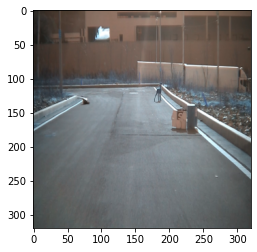

In [33]:
classes_names = ["포트홀 없음", "포트홀", "보수 완료된 포트홀"]
data = pd.read_csv("datasets_labels.csv")

id = 9251
src = cv2.imread(data["file_path"][id], cv2.IMREAD_COLOR)
print(classes_names[data["label"][id]])
plt.imshow(src)
plt.show()

# 데이터 Load
## Traing Data와 Validation Data 설정 1

In [47]:
seed = 7

classes_names = ["포트홀 없음", "포트홀", "보수 완료된 포트홀"]
train_data = pd.read_csv("Train_datasets_labels.csv")
validation_data = pd.read_csv("Validation_datasets_labels.csv")


train_data = train_data.sample(frac=1, random_state=seed).reset_index(drop=True)
validation_data = validation_data.sample(frac=1, random_state=seed).reset_index(drop=True)

print(len(train_data))
print(len(validation_data))

validation_data

23389
300


,file_path,label
0,Datasets_Validation/Image_255.png,2
1,Datasets_Validation/Image_58.png,0
2,Datasets_Validation/Image_151.png,1
3,Datasets_Validation/Image_67.png,0
4,Datasets_Validation/Image_115.png,1
...,...,...
295,Datasets_Validation/Image_212.png,2
296,Datasets_Validation/Image_68.png,0
297,Datasets_Validation/Image_26.png,0
298,Datasets_Validation/Image_197.png,1


In [48]:
import torch
from torch.utils.data import DataLoader, Dataset

In [52]:
class MyDataset(Dataset):
    def __init__(self, df):
        super(MyDataset, self).__init__()
        self.df = df
        
    def __len__(self):
        return len(self.df)
    
    def __getItem__(self, idx):
        file_path = self.df.iloc[idx][0]
        img = np.array(PIL.Image.open(train_data.iloc[idx][0])) / 255.
        
        x = torch.tensor(img).unsqueeze(0)
        y = torch.tensor([train_data.iloc[idx][1]]).unsqueeze(0)
        
        return x, y

In [53]:
train = MyDataset(train_data)

In [55]:
train.__getItem__(103)

(tensor([[[[0.2902, 0.2902, 0.2706],
           [0.2627, 0.2784, 0.2627],
           [0.2784, 0.2980, 0.2902],
           ...,
           [0.2863, 0.2824, 0.2588],
           [0.3765, 0.3647, 0.3137],
           [0.1412, 0.1333, 0.1216]],
 
          [[0.3020, 0.3020, 0.2784],
           [0.2941, 0.3098, 0.2980],
           [0.3020, 0.3216, 0.3137],
           ...,
           [0.2902, 0.2863, 0.2549],
           [0.4000, 0.3843, 0.3373],
           [0.2039, 0.1882, 0.1725]],
 
          [[0.3059, 0.3098, 0.2863],
           [0.3059, 0.3176, 0.3059],
           [0.3098, 0.3294, 0.3216],
           ...,
           [0.4118, 0.4078, 0.3725],
           [0.3961, 0.3804, 0.3373],
           [0.1804, 0.1647, 0.1412]],
 
          ...,
 
          [[0.1922, 0.2078, 0.2157],
           [0.1922, 0.2078, 0.2118],
           [0.1922, 0.2078, 0.2118],
           ...,
           [0.1451, 0.1608, 0.1765],
           [0.1451, 0.1608, 0.1765],
           [0.1451, 0.1608, 0.1765]],
 
          [[0.1882,